# Algo trading Project 4

Goal:
The purpose of this assignment is to do `Market Making Simulation ` under certain constrains.

# 1. Introduction

In this project, we build up two systems to performance the simulations about the market making:
- **Follow-Market System**: <br> 
In this system, we assume the Market Maker(MM) will have the **excat same ask-bid prices** as Market(M) has. Only one difference is that the price series of MM will be X ms lagged than that of M. 
- **Dynamic-Adjust System**: <br>
In this system, we let the MM to change its prices according to the new market event (new order, MM's net position or new M price).

We also design two different order sets to test our system under stable market and market where prices rocket up. We call this two order sets: **balanced order set** and **unbalanced order set**.

# 2. A brief look on Market data

### 1) Market prices

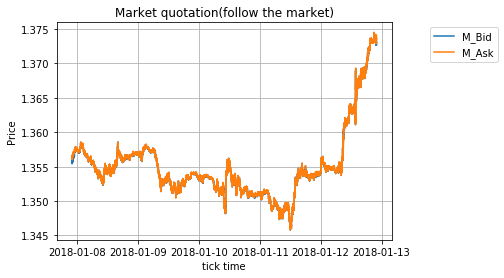

In [129]:
ba_bid_ask

As we can see in above figure, market flow form 01-08 to 01-11 is quite stable, while form 01-12 to 01-13, the price goes up significantly. We assume they are two kinds of different market. <br>

### **2) Design our data sets based on market flow**
Accourding to what we find above, we decided to have two different order sets for different time period of the market: 
- **Balanced order set**: this set includes orders appears during 2018-01-07 to 2018-01-08. According to market price trend, the number of buy orders and sell orders are almost the same.
- **Unbalanced order set**: this set includes orders appear in 2018-01-12. Since market price increases, we can let it contain more Buy Order. And we have a ratio of 2:1 (Buy order : Sell Order)

In these two order sets, we assume that two orders can't follow each other faster than a succession time (5 ms).

### 3) Distribution of ask-bid prices

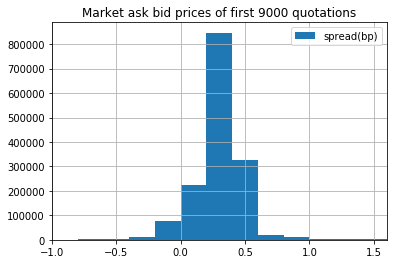

In [130]:
figure_spread

The distribution of spread is shwon above, it is close to normal distribution and the median of it is around 0.3-0.4 bp, which can help us to roughly decides how much we want to **skew market price** to raise the probability of getting orders in Dynamic-Adjust strategy.

# 2. Follow-Market Strategy

In this model,we assume the Market Maker(MM) will have the **excat same ask-bid prices** as Market(M) has. Only one difference is that the price series of MM will be X ms lagged than that of M. 

We also put some constraints on the model:
- **Loss Limit(L)**: <br>Our overall PnL can't excced this limit or we will stop all trades.
- **max net position(K)**: <br>If this is triggered, we will stop getting order that will make our net position worse.
- **Cost to hedge our position(k)**: <br>When we want to hedge our position, we can't just execute as market prices. We have k more per unit need to pay to get rid of current position

As shown in the two graphes below, for our balanced order time interval, the market prices are not changing very much, while for our unbalaced order, the market rockets up. The market prices changes over time and this change our overall PnL. So in later simulation, the absolute value of PnL is not that useful, but we can tune our parameters by the relative value of the PnL.

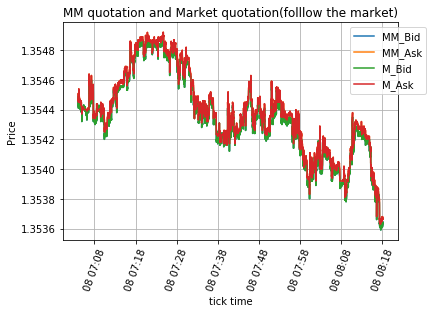

In [169]:
market_follow_order_1

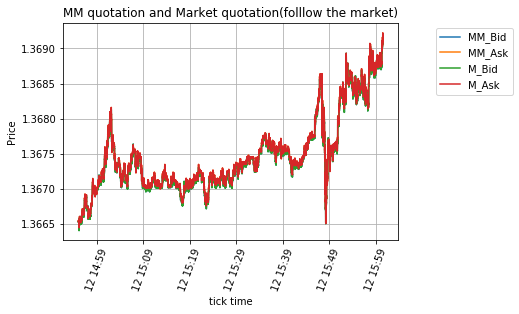

In [170]:
market_follow_order_2

### 1) Anlysis of Follow-Market strategy on balanced dataset

**Different X**<br>
We changes X from X = 5 ms to 3000 ms, the result is not much different from each other. It is because the prices of M does not change very much. X is insensitive in stable market.

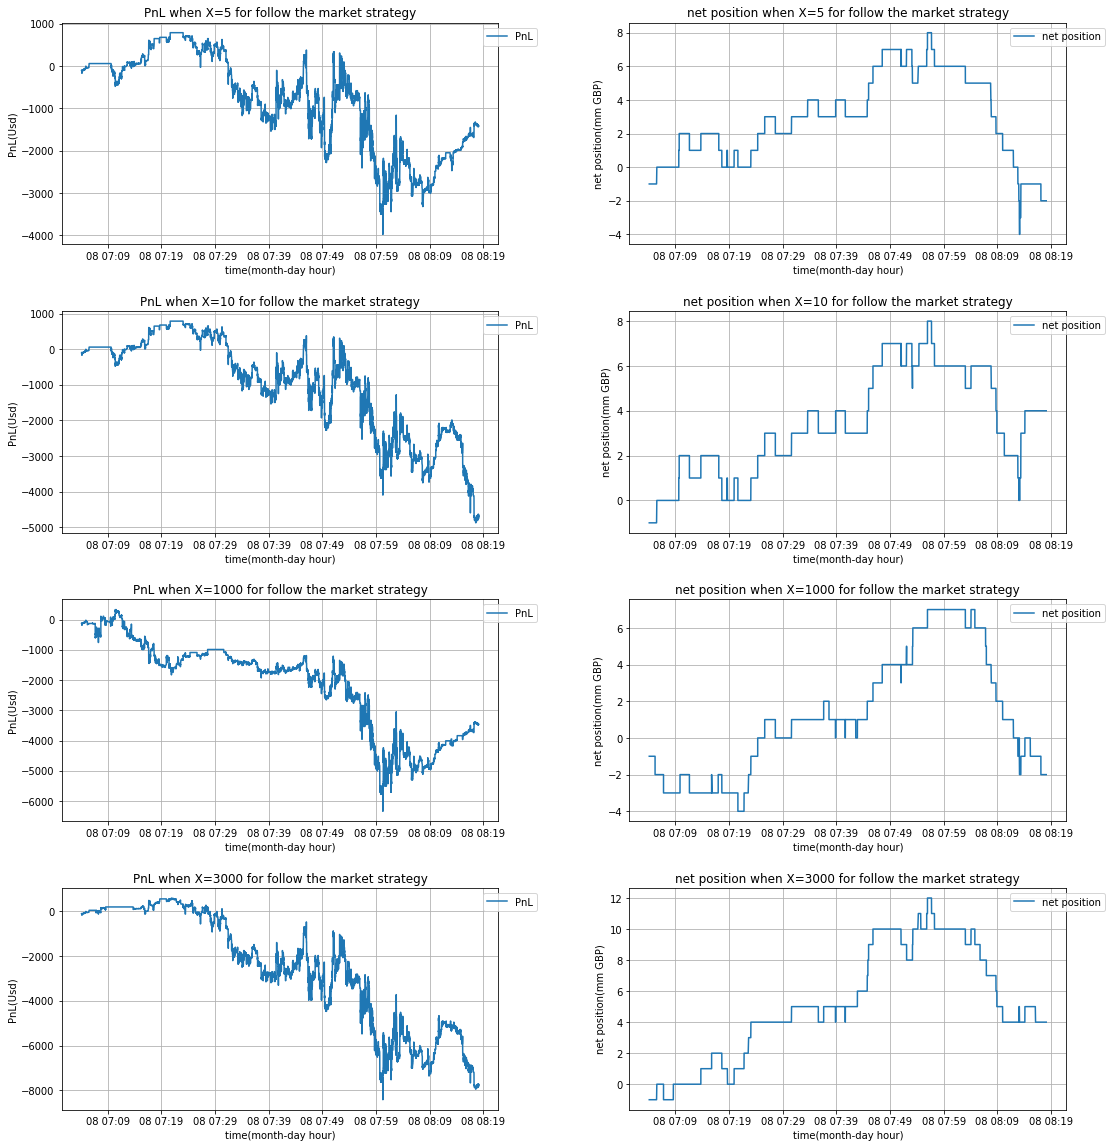

In [209]:
following_market_order_1_res_1

Although the net positions are simmilar to each other, the number of the quotations that worse than market grows significantly. 

In [273]:
print_X_counts(what_happen_list)

When X=3:
sell at M price and succeed    26
buy at M price and succeed     24
buy at M price but failed      21
sell at M price but failed     18
worse than market price         1
Name: 0, dtype: int64
When X=5:
buy at M price and succeed     27
sell at M price and succeed    23
sell at M price but failed     20
buy at M price but failed      18
sell better than M price        1
worse than market price         1
Name: 1, dtype: int64
When X=8:
sell at M price and succeed    19
worse than market price        15
buy better than M price        13
buy at M price but failed      13
buy at M price and succeed     12
sell better than M price        9
sell at M price but failed      9
Name: 2, dtype: int64
When X=10:
worse than market price        26
buy better than M price        17
sell at M price and succeed    14
sell at M price but failed     12
buy at M price and succeed      8
sell better than M price        7
buy at M price but failed       6
Name: 3, dtype: int64


**Different net position limit (K)**<br>
Setting tighter constrant on K helps us let net position fluctuates in a smaller interval but

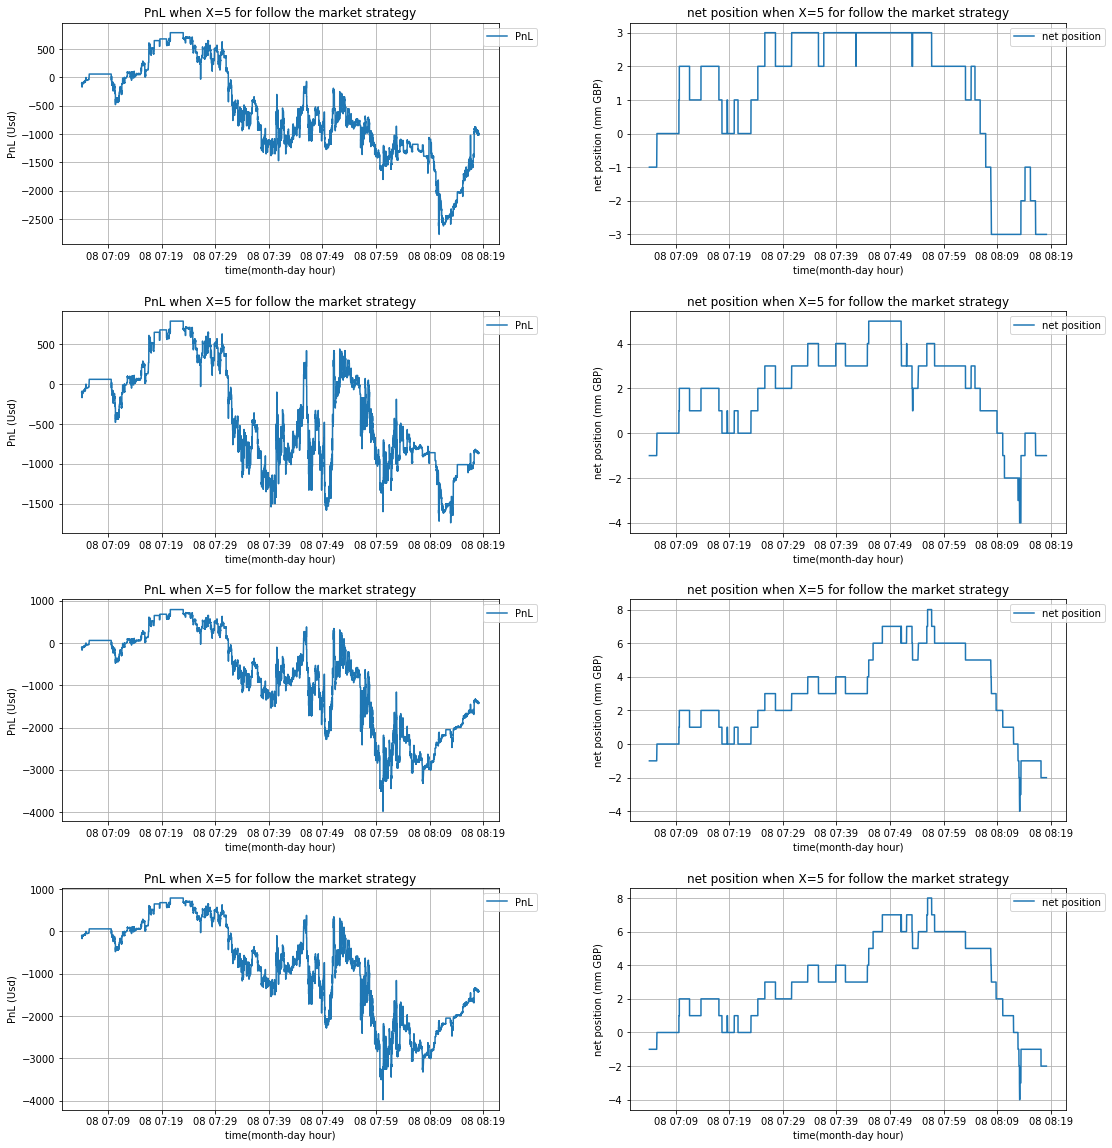

In [210]:
following_market_order_1_res_2

From the below tables, we can find that there are 28 orders that triggered max position in K = 3 case and this cause us **lose a lot of business**. There are 3,0,0 orders triggered `max net position` for K = 5,8,10.

In [283]:
print_K_counts(what_happen_list)

When K=3:
max open position triggered    28
sell at M price and succeed    19
buy at M price and succeed     16
sell at M price but failed     14
buy at M price but failed      12
worse than market price         1
Name: 0, dtype: int64
When K=5:
sell at M price and succeed    25
buy at M price and succeed     24
sell at M price but failed     19
buy at M price but failed      18
max open position triggered     3
worse than market price         1
Name: 1, dtype: int64
When K=8:
sell at M price and succeed    26
buy at M price and succeed     24
buy at M price but failed      21
sell at M price but failed     18
worse than market price         1
Name: 2, dtype: int64
When K=10:
sell at M price and succeed    26
buy at M price and succeed     24
buy at M price but failed      21
sell at M price but failed     18
worse than market price         1
Name: 3, dtype: int64


### 2) Anlysis of Follow-Market strategy on unbalanced dataset

**Different X**<br>
In an upward market, our model is quite **sensitive** to the X changes. The changes of X might give us rapid growth in net position, which is not what we want to see.

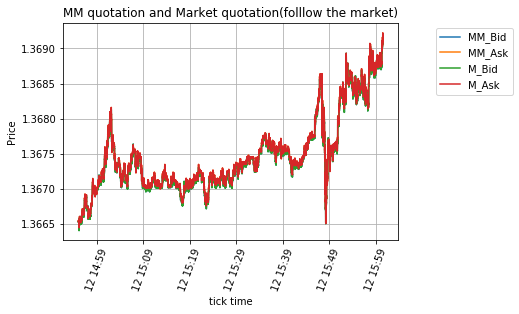

In [287]:
market_follow_order_2

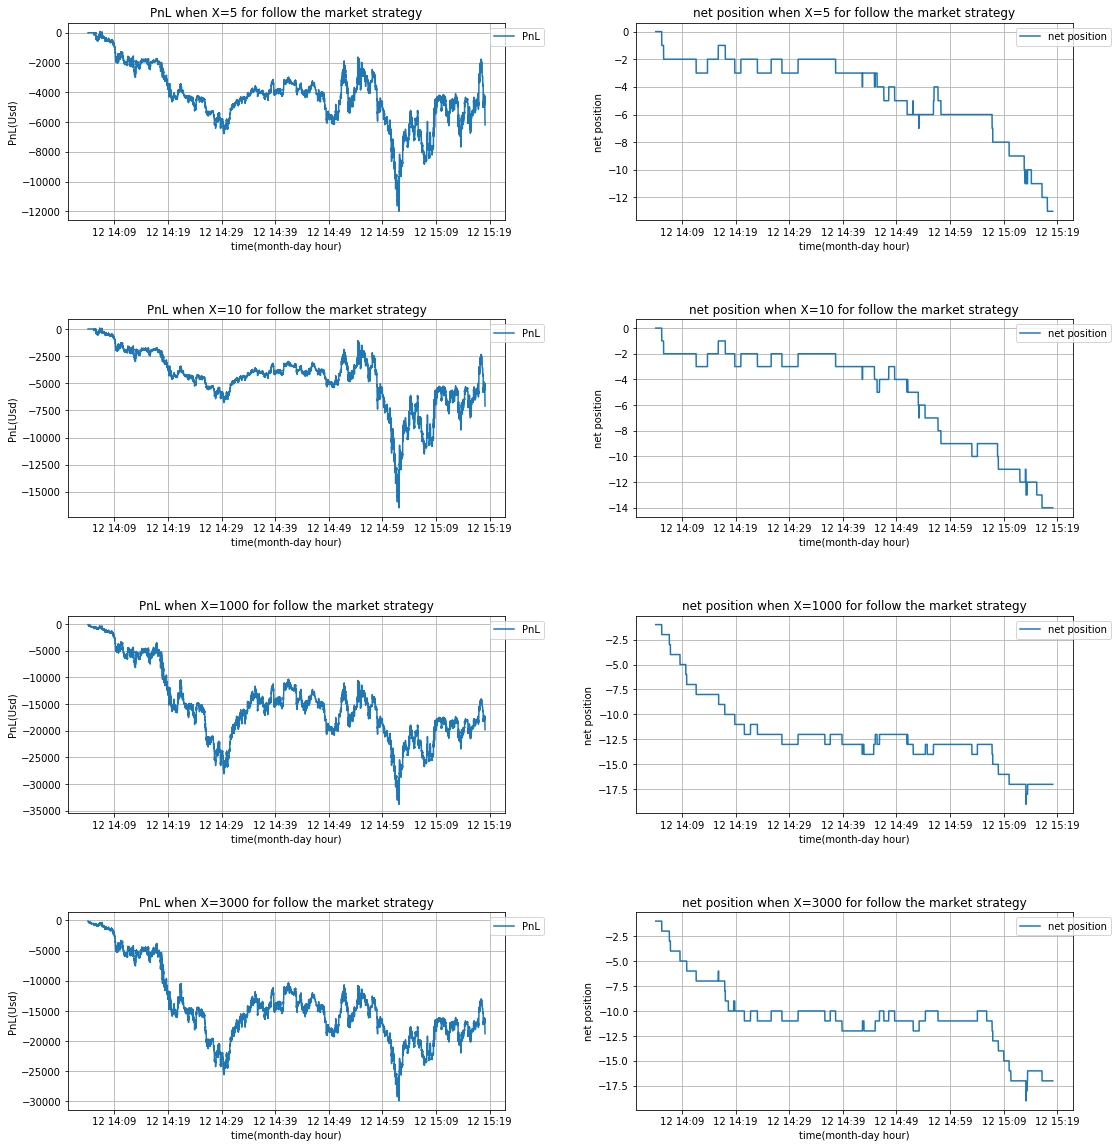

In [178]:
following_market_order_2_X

As X goes up, we lose control of our strategy:
It is designed to be a follow-market strategy and there should not been much `better than market execution`. However, we get a lot of those when X = 1000 and X=3000 shwon in tables below.

In [183]:
print_X_counts(what_happen_list_2)

When X=3:
sell at M price but failed     31
sell at M price and succeed    27
buy at M price but failed      16
buy at M price and succeed     13
worse than market price         2
buy better than M price         1
Name: 0, dtype: int64
When X=5:
sell at M price but failed     30
sell at M price and succeed    27
buy at M price but failed      16
buy at M price and succeed     12
worse than market price         3
buy better than M price         1
sell better than M price        1
Name: 1, dtype: int64
When X=8:
worse than market price        31
sell better than M price       26
buy better than M price         9
sell at M price but failed      9
buy at M price but failed       6
sell at M price and succeed     5
buy at M price and succeed      4
Name: 2, dtype: int64
When X=10:
worse than market price        30
sell better than M price       29
buy better than M price        15
sell at M price but failed      6
sell at M price and succeed     5
buy at M price but failed       4
buy at M 

**Different K**<br>
In an upward market, our model is **insensitive** to the X changes. The result will be excat the same in this case.

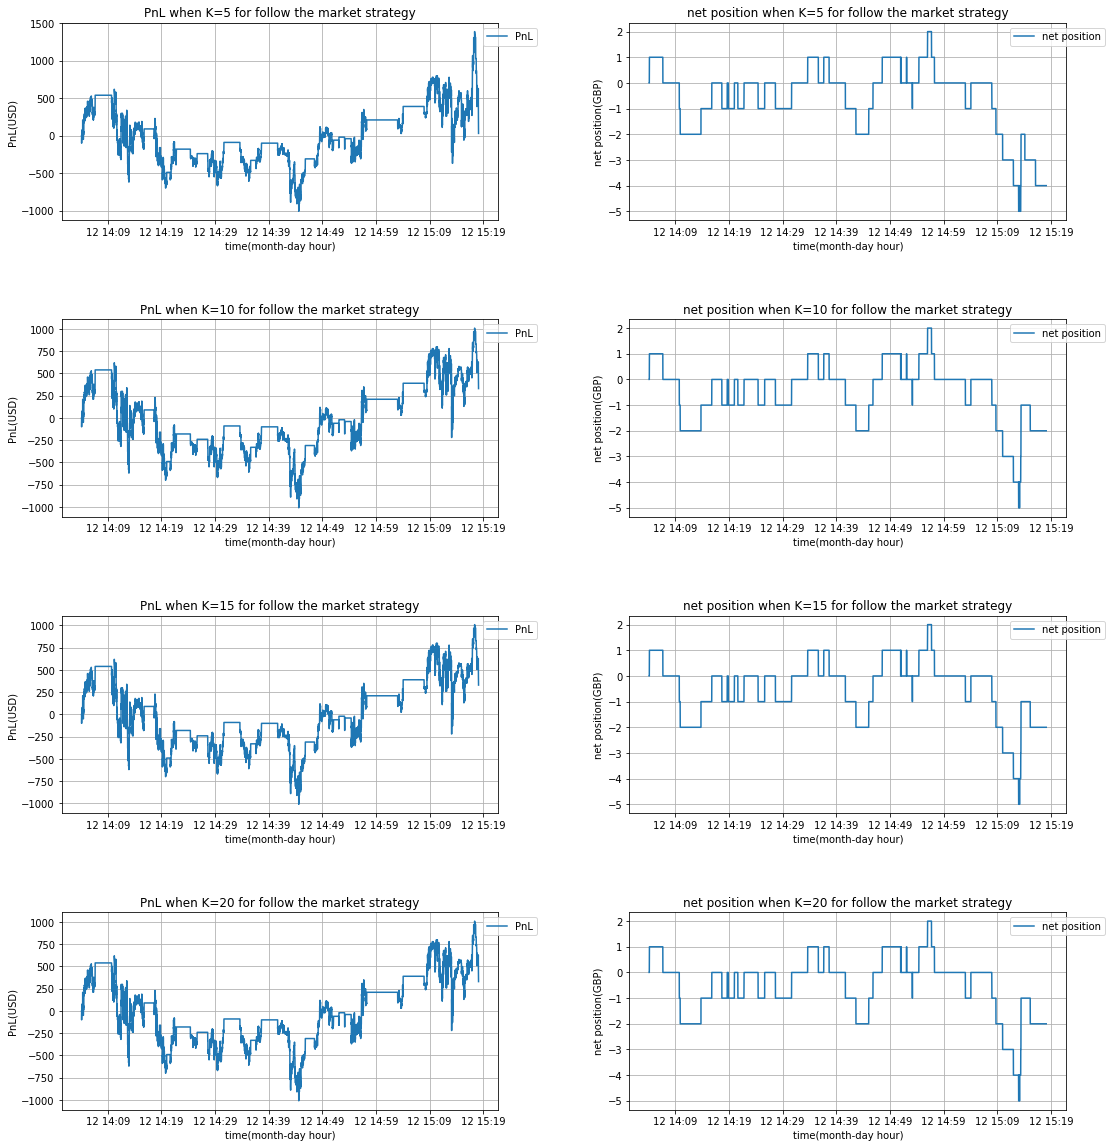

In [95]:
following_market_order_2_K

In [179]:
print_K_counts(what_happen_list)

When K=3:
max open position triggered    28
sell at M price and succeed    19
buy at M price and succeed     16
sell at M price but failed     14
buy at M price but failed      12
worse than market price         1
Name: 0, dtype: int64
When K=5:
sell at M price and succeed    25
buy at M price and succeed     24
sell at M price but failed     19
buy at M price but failed      18
max open position triggered     3
worse than market price         1
Name: 1, dtype: int64
When K=8:
sell at M price and succeed    26
buy at M price and succeed     24
buy at M price but failed      21
sell at M price but failed     18
worse than market price         1
Name: 2, dtype: int64
When K=10:
sell at M price and succeed    26
buy at M price and succeed     24
buy at M price but failed      21
sell at M price but failed     18
worse than market price         1
Name: 3, dtype: int64


# 2. Dynamic-Adjust Strategy

### 1) Anlysis of Dynamic-Adjust strategy on balanced dataset

**Different X**<br>
Simmilar to Follow Market model, Dynamic-Adjust Model is  **insensitive** to the X because if market prices are stable, it will have less negative effects.

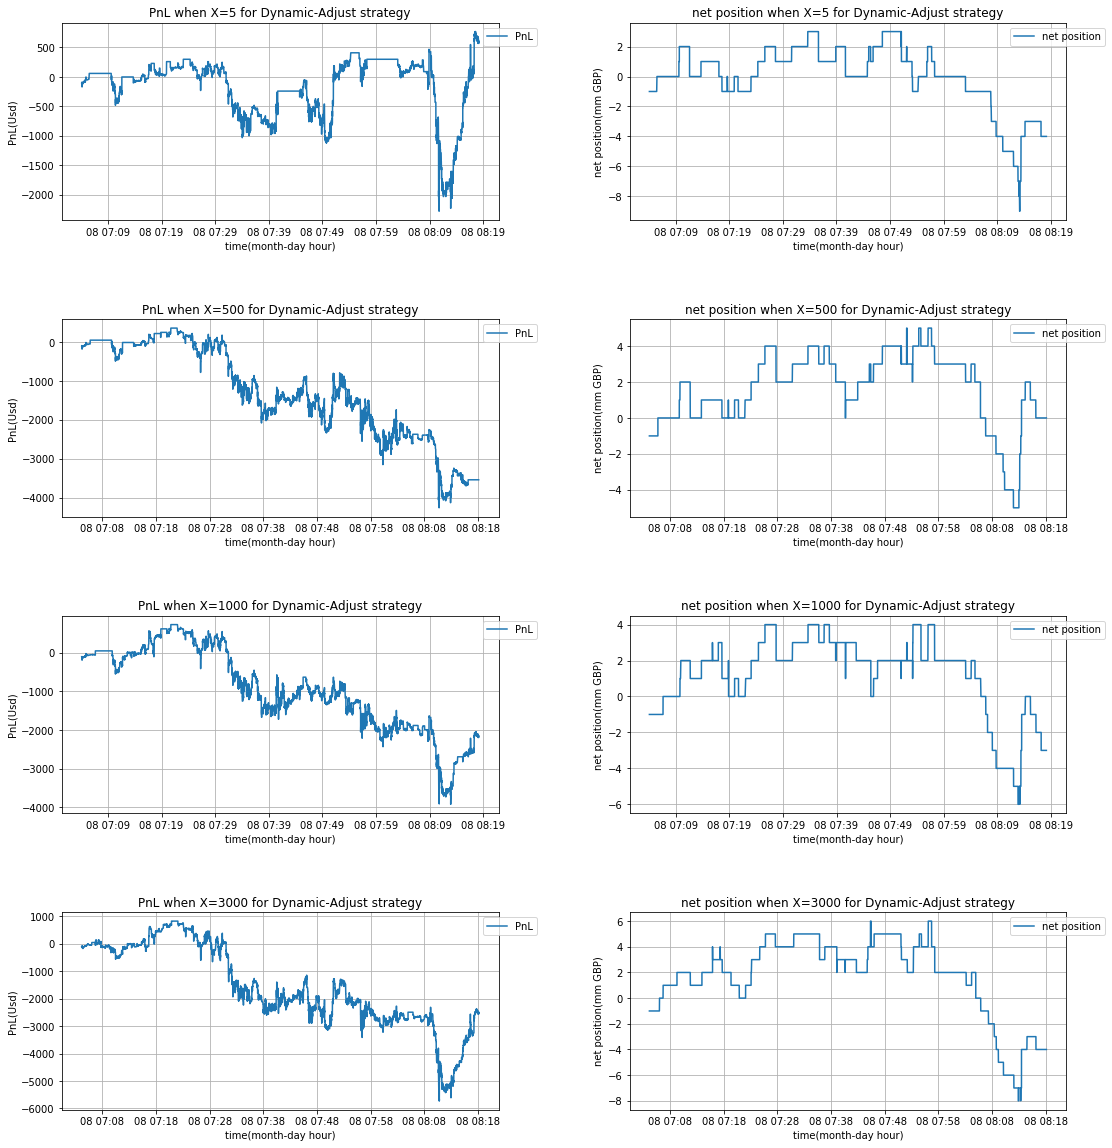

In [157]:
DA_strategy_figure_order_1_X

**Different K**<br>
As we can see from the graphes above that net position never goes beyond 6 or -6. So changes of K will not have much effect on the results.

**Skew the market price in one direction** <br>

We want to twist our quotation by giving our ask or bid better than market. In this way, we can get more orders in the direction we want. To beat the market price, we think that 0.1 bp (min quotation changes)better than the market is a safe choice.

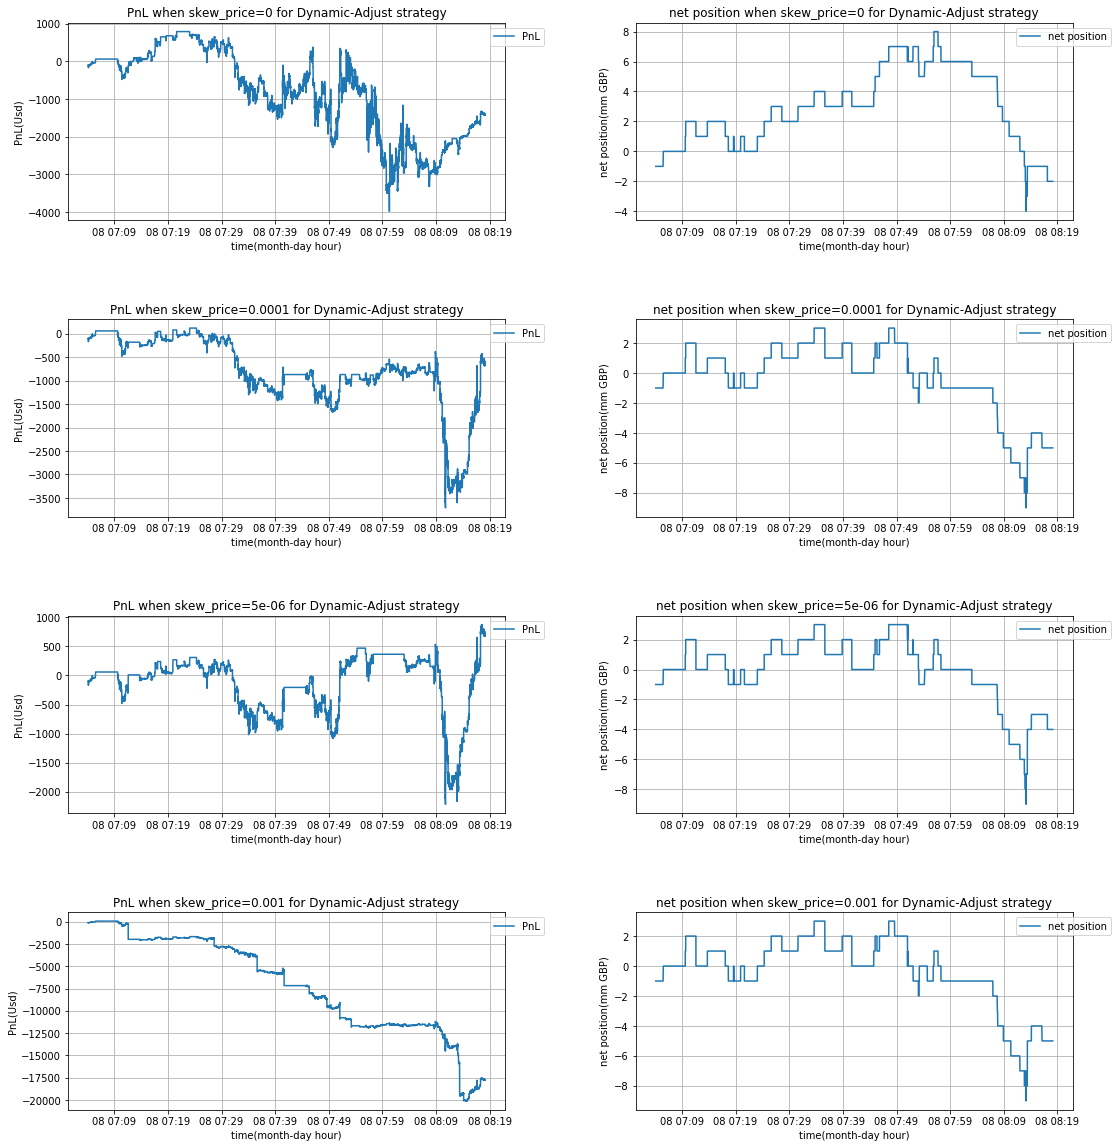

In [135]:
DA_strategy_figure_order_1_skew_price

We can see that no matter how much our prices beat the M price, it will end up of the same net position and the PnL will be different. That is why we choose the min changes of the market quotation.

Also, we find from the graph above that, although the net position performs well in the most of time, net position goes down sharply. Let's see what happens in the orders and their execution at that `abnormal part`.

In [147]:
order[62:80]

,Side,Time
62,B,1-8-2018 7:57:17...
63,B,1-8-2018 8:03:03...
64,S,1-8-2018 8:04:05...
65,B,1-8-2018 8:04:48...
66,B,1-8-2018 8:05:48...
67,B,1-8-2018 8:06:48...
68,B,1-8-2018 8:06:59...
69,B,1-8-2018 8:07:49...
70,B,1-8-2018 8:07:58...
71,B,1-8-2018 8:08:44...


A lots of buy orders and only a few sell orders make our net position goes negatively. Although, at that period of time, we raise our bid prices to attract more `sell orders`, we lower our ask price to turn down the `buy orders`. That is why we did not keep our prices in a range we want to see.

### 2) Anlysis of Dynamic-Adjust strategy on unbalanced dataset

In an upward market, we have more sell orders than buy order. However, we offer a better price for sell orders so that we raise our probability of exectue a sell order from 50% to nearly 100%.

In [167]:
MMorders_res_2['what happened'].value_counts()

sell at M price and succeed    31
sell at M price but failed     25
buy better than M price        16
buy at M price and succeed     10
buy at M price but failed       4
sell better than M price        2
worse than market price         2
Name: what happened, dtype: int64

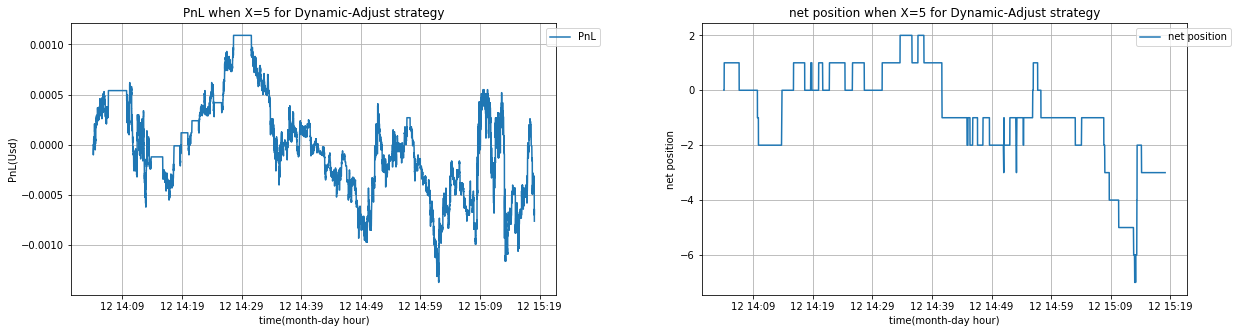

In [156]:
DA_strategy_figure_order_2

There are a lot of orders executed at better prices than the market, which helps us to control our net position in a more narrow range.

# 4. Conclusion

- Follow-Market startegy performs fine in stable market, but suffers net position explosion in upward or downward market.
- Dynamic-Adjust strategy can, to some degree, resist the upward or downward market. However, it can't stand extremely biased orders set in a short period of time( all buy orders given in one minute we already has a negative net position.)
- In comparison, Dynamic-Adjust strategy is a more robust strategy than Follow-Market Strategy.

In [2]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import math
import random

# Get data and order set

In [3]:
ba=pd.read_csv('2.csv',encoding='utf-16-le',index_col=0)#read csv in utf-16
ba.head().round(2)

,Bid,Ask
DateTime,,
01/07/2018 22:02:03.832,1.36,1.36
01/07/2018 22:02:03.845,1.36,1.36
01/07/2018 22:02:03.851,1.36,1.36
01/07/2018 22:02:03.859,1.36,1.36
01/07/2018 22:02:04.114,1.36,1.36


In [4]:
order = pd.read_csv("order_set_balance.csv")
order_2 = pd.read_csv("order_set_notbalance.csv")
order.head().round(2)

,Side,Time
0,B,1-8-2018 7:04:07.088
1,S,1-8-2018 7:04:07.970
2,B,1-8-2018 7:05:14.230
3,S,1-8-2018 7:05:34.237
4,S,1-8-2018 7:06:38.769


In [5]:
ba.index=pd.to_datetime(ba.index,format='%m/%d/%Y %H:%M:%S.%f')# change time in '%m/%d/%Y %H:%M:%S.%f' format to datetime timestamp
order_timestamp=pd.to_datetime(order['Time'],format='%m-%d-%Y %H:%M:%S.%f')
order_timestamp_2=pd.to_datetime(order_2['Time'],format='%m-%d-%Y %H:%M:%S.%f')

In [6]:
order_timestamp.head()

0   2018-01-08 07:04:07.088
1   2018-01-08 07:04:07.970
2   2018-01-08 07:05:14.230
3   2018-01-08 07:05:34.237
4   2018-01-08 07:06:38.769
Name: Time, dtype: datetime64[ns]

In [7]:
order_timestamp_2.head()

0   2018-01-12 14:04:07.088
1   2018-01-12 14:04:07.970
2   2018-01-12 14:05:14.230
3   2018-01-12 14:05:34.237
4   2018-01-12 14:06:38.769
Name: Time, dtype: datetime64[ns]

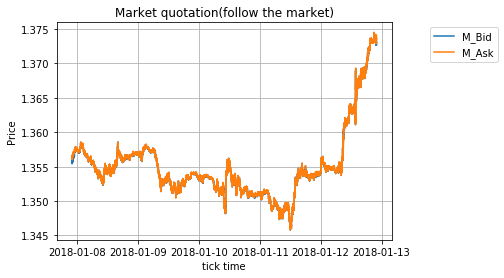

In [8]:
ba_bid_ask=plt.figure()
plt.plot(ba)
plt.legend(['M_Bid','M_Ask'],bbox_to_anchor=(1.1,1))
plt.grid()
plt.title('Market quotation(follow the market)')
plt.xlabel('tick time')
plt.ylabel('Price')
_ = plt.show()

In [9]:
spread = ba["Ask"]-ba["Bid"]
spread = spread*10000

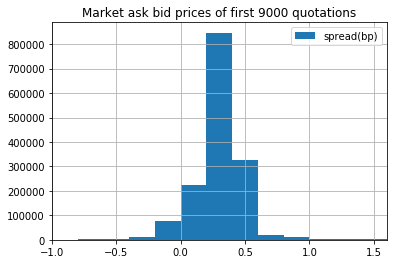

In [10]:
figure_spread = plt.figure()
plt.hist(spread,bins = 50)
plt.title("Market ask bid prices of first 9000 quotations")
plt.legend(["spread(bp)"])
plt.xlim((-1, 1.6))
plt.grid()
_ = plt.show

As we can see in above figure, change of market price in interval 2018-01-08 to 2018-01-11 is relatively small comparing with change of market price in 2018-01-12.

In order to test our strategy and show our result clearly, we make two order set. 

Order set 1 includes orders in 2018-01-07 and 2018-01-08. According to market price trend, the number of buy orders and sell orders are almost the same.

Order set 2 includes orders in 2018-01-12. Because market price increases, we can assume the number of buy orders is more than sell orders.

In these two order sets, we make order succession time — two orders can follow each other no faster than 5 msec.

In [11]:
ba_MM = ba.copy()

In [12]:
def find_pos(order_timestamp,ba):   #given order time and the trading time, find the the start pos for teach order
    out=[]
    for i,time in enumerate(order_timestamp):
        temp = ba.index.get_loc(time,method ='ffill')
        out.append(temp)
    return out

## 1)MM quotes at the market price
For each Market(M) quotation, MM will just agree to this price and quates at the market price.

In [173]:
def follow_market(ba,order_timestamp,start_pos_M,start_pos_MM,order,L,k,K):   
    #L: max PnL loss,k: price markup to settle with other market makers,K: open position limit
    net_pos_temp = 0 #if positive means we have GBP(Base currency), if negative means we have short position in GBP.
    curr_order = 0#ith order
    net_pos = [] 
    PnL = [] # if we settled our pos immedeately
    my_index = []
    
    cash_pos = []
    cash_pos_temp = 0 # in USD,how much we have in cash or how much we owe
    what_happen=[]
    net_pos_order = []
    price_order=[]
    
    random.seed(a = 44)
    
    for i in np.arange(start_pos_M[0],start_pos_M[-1]+1):
        
        if (i == start_pos_M[curr_order] and order["Side"][curr_order]=="B" and net_pos_temp<=-K):
            what_happen.append("max open position triggered")
            net_pos_order.append(net_pos_temp)
            curr_order+=1
            if(curr_order == len(order_timestamp)):break
        if (i == start_pos_M[curr_order] and order["Side"][curr_order]=="B" and net_pos_temp>-K):
            M  = ba["Ask"][i]
            MM = ba_MM["Ask"][start_pos_MM[curr_order]]
            if( MM == M ):
                if (random.random()>0.5):
                    what_happen.append("sell at M price and succeed")
                    price_order.append(MM)
                    net_pos_temp -=1 # buy gbp from me, my net_pos will decrease by 1
                    cash_pos_temp += MM #buy gbp from me，you need to pay me in USD at MM price
                    net_pos_order.append(net_pos_temp)
                else:
                    what_happen.append("sell at M price but failed")
                    price_order.append("-")
                    net_pos_order.append(net_pos_temp)
                
            if(MM<M):
                what_happen.append("sell better than M price")
                price_order.append(MM)
                net_pos_temp -=1
                cash_pos_temp += MM
                net_pos_order.append(net_pos_temp)
            if(MM>M):
                what_happen.append("worse than market price")
                price_order.append("-")
                net_pos_order.append(net_pos_temp)
            curr_order+=1
            if(curr_order == len(order_timestamp)):break
                
                
        if (i == start_pos_M[curr_order] and order["Side"][curr_order]=="S"and net_pos_temp>=K):
            what_happen.append("max open position triggered")    
            net_pos_order.append(net_pos_temp)
            curr_order+=1
            if(curr_order == len(order_timestamp)):break
        if (i == start_pos_M[curr_order] and order["Side"][curr_order]=="S"and net_pos_temp<K):
            M  = ba["Bid"][i]
            MM = ba_MM["Bid"][start_pos_MM[curr_order]]
            if( MM == M ):
                if (random.random()>0.5):
                    what_happen.append("buy at M price and succeed")
                    price_order.append(MM)
                    net_pos_temp +=1 # buy 1mm gbp from me, my net_pos will decrease by 1
                    cash_pos_temp -=  MM #buy 1mm gbp from me，you need to pay me in USD at MM price   
                    net_pos_order.append(net_pos_temp)
                else:
                    what_happen.append("buy at M price but failed")
                    price_order.append("-")
                    net_pos_order.append(net_pos_temp)
            if(MM>M):
                what_happen.append("buy better than M price")
                price_order.append(MM)
                net_pos_temp +=1
                cash_pos_temp -= MM
                net_pos_order.append(net_pos_temp)
            if(MM<M):
                what_happen.append("worse than market price")
                price_order.append("-")
                net_pos_order.append(net_pos_temp)
                
            curr_order+=1
            if(curr_order == len(order_timestamp)):break
            
            
        if (net_pos_temp>0): #we have gbp and need to sell to the market to clear our position
            PnL.append(cash_pos_temp+(net_pos_temp*(ba["Bid"][i]-k)))
        if(net_pos_temp < 0):PnL.append(cash_pos_temp +(net_pos_temp*(ba["Ask"][i]+k)))
        if(net_pos_temp == 0):PnL.append(cash_pos_temp)
        
        if (PnL[-1]<-L):
            print("damage control")
            break
            print(ba.index[i])
            
        cash_pos.append(cash_pos_temp)
        net_pos.append(net_pos_temp)
        my_index.append(ba.index[start_pos_MM[curr_order-1]])
        
        while(start_pos_M[curr_order-1]==start_pos_M[curr_order]):
            
            if (i == start_pos_M[curr_order] and order["Side"][curr_order]=="B" and net_pos_temp<=-K):
                what_happen.append("max open position triggered")
                price_order.append("-")
                net_pos_order.append(net_pos_temp)
                curr_order+=1
                if(curr_order == len(order_timestamp)):break
            if (i == start_pos_M[curr_order] and order["Side"][curr_order]=="B" and net_pos_temp>-K):
                M  = ba["Ask"][i]
                MM = ba_MM["Ask"][start_pos_MM[curr_order]]
                if( MM == M ):
                    if (random.random()>0.5):
                        what_happen.append("sell at M price and succeed")
                        price_order.append(MM)
                        net_pos_temp -=1 # buy gbp from me, my net_pos will decrease by 1
                        cash_pos_temp += MM #buy gbp from me，you need to pay me in USD at MM price
                        net_pos_order.append(net_pos_temp)
                    else:
                        what_happen.append("sell at M price but failed")
                        net_pos_order.append(net_pos_temp)
                        price_order.append("-")

                if(MM<M):
                    what_happen.append("sell better than M price")
                    price_order.append(MM)
                    net_pos_temp -=1
                    cash_pos_temp += MM
                    net_pos_order.append(net_pos_temp)
                if(MM>M):
                    what_happen.append("worse than market price")
                    price_order.append("-")
                    net_pos_order.append(net_pos_temp)
                curr_order+=1
                if(curr_order == len(order_timestamp)):break


            if (i == start_pos_M[curr_order] and order["Side"][curr_order]=="S"and net_pos_temp>=K):
                what_happen.append("max open position triggered")   
                price_order.append("-")
                net_pos_order.append(net_pos_temp)
                curr_order+=1
                if(curr_order == len(order_timestamp)):break
            if (i == start_pos_M[curr_order] and order["Side"][curr_order]=="S"and net_pos_temp<K):
                M  = ba["Bid"][i]
                MM = ba_MM["Bid"][start_pos_MM[curr_order]]
                if( MM == M ):
                    if (random.random()>0.5):
                        what_happen.append("buy at M price and succeed")
                        price_order.append(MM)
                        net_pos_temp +=1 # buy 1mm gbp from me, my net_pos will decrease by 1
                        cash_pos_temp -=  MM #buy 1mm gbp from me，you need to pay me in USD at MM price   
                        net_pos_order.append(net_pos_temp)
                    else:
                        what_happen.append("buy at M price but failed")
                        price_order.append("-")
                        net_pos_order.append(net_pos_temp)
                if(MM>M):
                    what_happen.append("buy better than M price")
                    price_order.append(MM)
                    net_pos_temp +=1
                    cash_pos_temp -= MM
                    net_pos_order.append(net_pos_temp)
                if(MM<M):
                    what_happen.append("worse than market price")
                    price_order.append("-")
                    net_pos_order.append(net_pos_temp)

                curr_order+=1
                if(curr_order == len(order_timestamp)):break


            if (net_pos_temp>0): #we have gbp and need to sell to the market to clear our position
                PnL[-1]=(cash_pos_temp+(net_pos_temp*(ba["Bid"][i]-k)))
            if(net_pos_temp < 0):PnL[-1]=(cash_pos_temp +(net_pos_temp*(ba["Ask"][i]+k)))
            if(net_pos_temp == 0):PnL[-1]=(cash_pos_temp)

            if (PnL[-1]<-L):
                print("damage control")
                break
                print(ba.index[i])

            cash_pos.append(cash_pos_temp)
            net_pos[-1] =(net_pos_temp)
            my_index.append(order_timestamp[curr_order-1])


            
        
    return [net_pos,PnL,cash_pos,what_happen,net_pos_order,my_index, price_order] 
                       
                       
        
            
        
                
        

## Analysis for market following strategy

Set MM as lagged(5 ms) of M

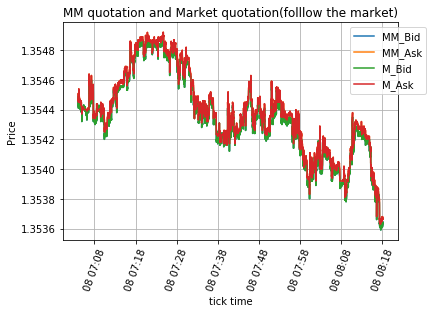

In [14]:

a = 48337
b = 63755
ba_MM.index = ba.index+datetime.timedelta(milliseconds=5)

market_follow_order_1=plt.figure()
plt.plot(ba_MM[a:b])
plt.plot(ba[a:b])
plt.legend(['MM_Bid','MM_Ask','M_Bid','M_Ask'],bbox_to_anchor=(1.1,1))
plt.grid()
plt.title('MM quotation and Market quotation(folllow the market)')
plt.xlabel('tick time')
plt.ylabel('Price')
plt.xticks(rotation = 70)
_ = plt.show()

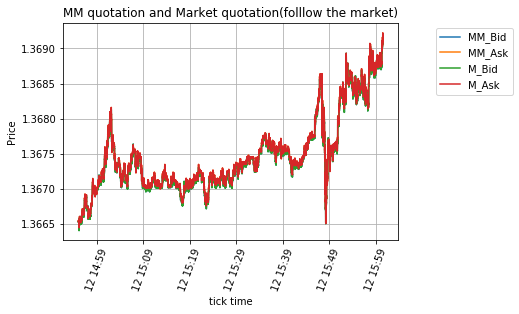

In [15]:

a = 1405151
b =  1438179
ba_MM.index = ba.index+datetime.timedelta(milliseconds=5)

market_follow_order_2=plt.figure()
plt.plot(ba_MM[a:b])
plt.plot(ba[a:b])
plt.legend(['MM_Bid','MM_Ask','M_Bid','M_Ask'],bbox_to_anchor=(1.1,1))
plt.grid()
plt.title('MM quotation and Market quotation(folllow the market)')
plt.xlabel('tick time')
plt.ylabel('Price')
plt.xticks(rotation = 70)
_ = plt.show()

As we can see in the picture, because 5 milliseconds is really small, market maker quotation is almost same as market quotation.

### analysis for order set 1

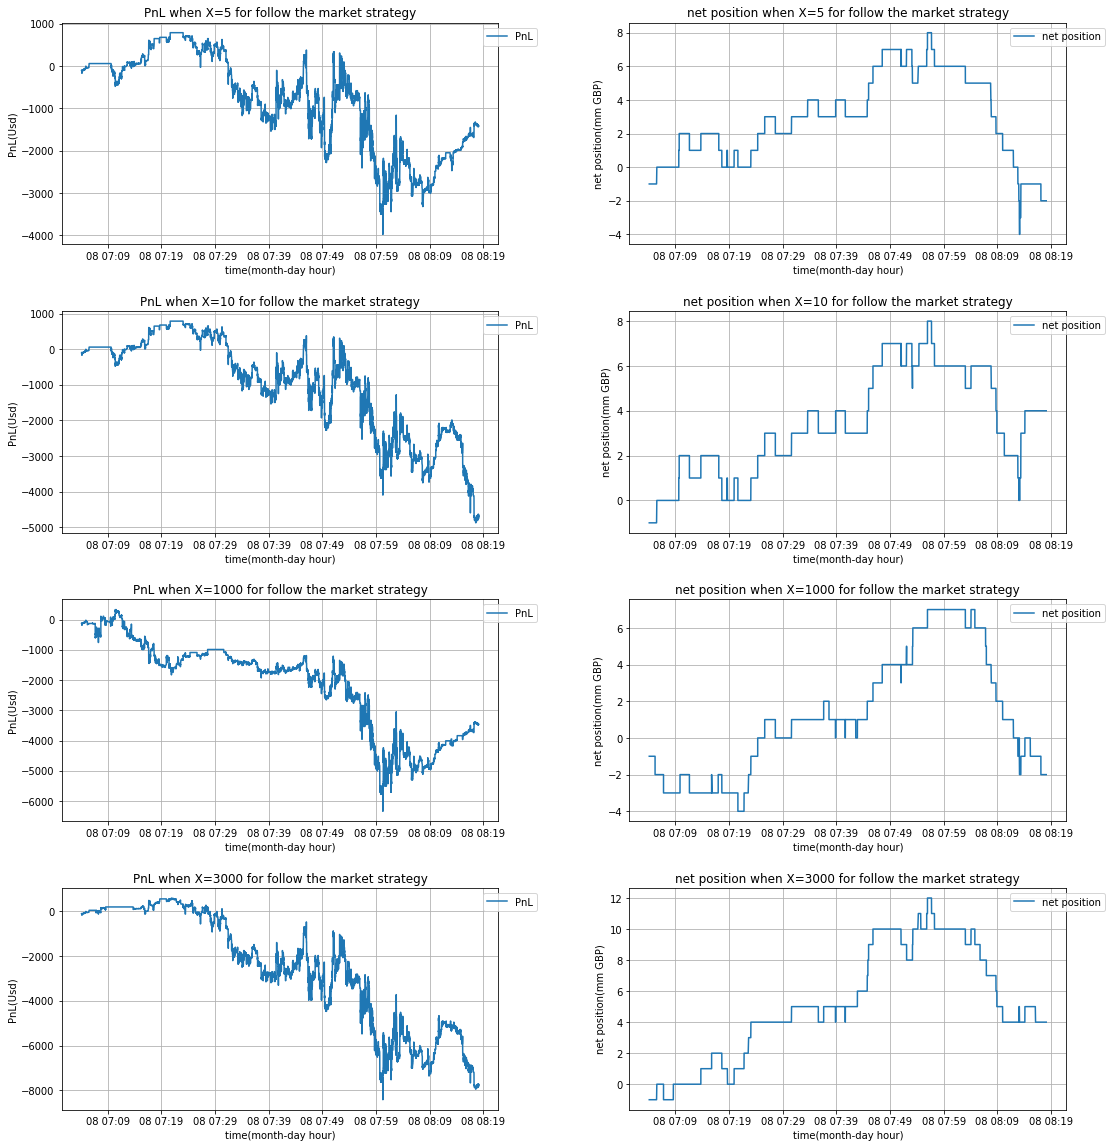

In [16]:
L =10000#no loss limit
k = 0.0001
K = 100
what_happen_list=[]
net_pos_list=[]
price_order_list=[]
following_market_order_1_res_1=plt.figure(figsize=(18,20))
for i,X in enumerate([5,10,1000,3000]): #X:MM reaction time — assume 5 msec — 
       #ie tie for MM to adjust its spread after a market event — new tick or new order whether filled or not 
    ba_MM.index = ba.index+datetime.timedelta(milliseconds=X)
    start_pos_M = find_pos(order_timestamp,ba)
    start_pos_MM = find_pos(order_timestamp,ba_MM)
   
    net_pos, PnL, cash_pos, what_happen, net_pos_order,my_index, price_order  = follow_market(ba,order_timestamp,start_pos_M,start_pos_MM,order,L,k,K)
    what_happen_list.append(what_happen)
    net_pos_list.append(net_pos_order)
    price_order_list.append(price_order)
    
    plt.subplot(4,2,2*(1+i)-1)
    plt.plot(ba.index[start_pos_M[0]:start_pos_M[-1]],np.array(PnL)*1000000)
    plt.legend(['PnL'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('PnL when X={} for follow the market strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('PnL(Usd)')
    
    
    
    plt.subplot(4,2,2*(i+1)) 
    plt.plot(ba.index[start_pos_M[0]:start_pos_M[-1]],net_pos)
    plt.legend(['net position'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('net position when X={} for follow the market strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('net position(mm GBP)')
    plt.subplots_adjust(wspace =0.3, hspace =0.3)
 

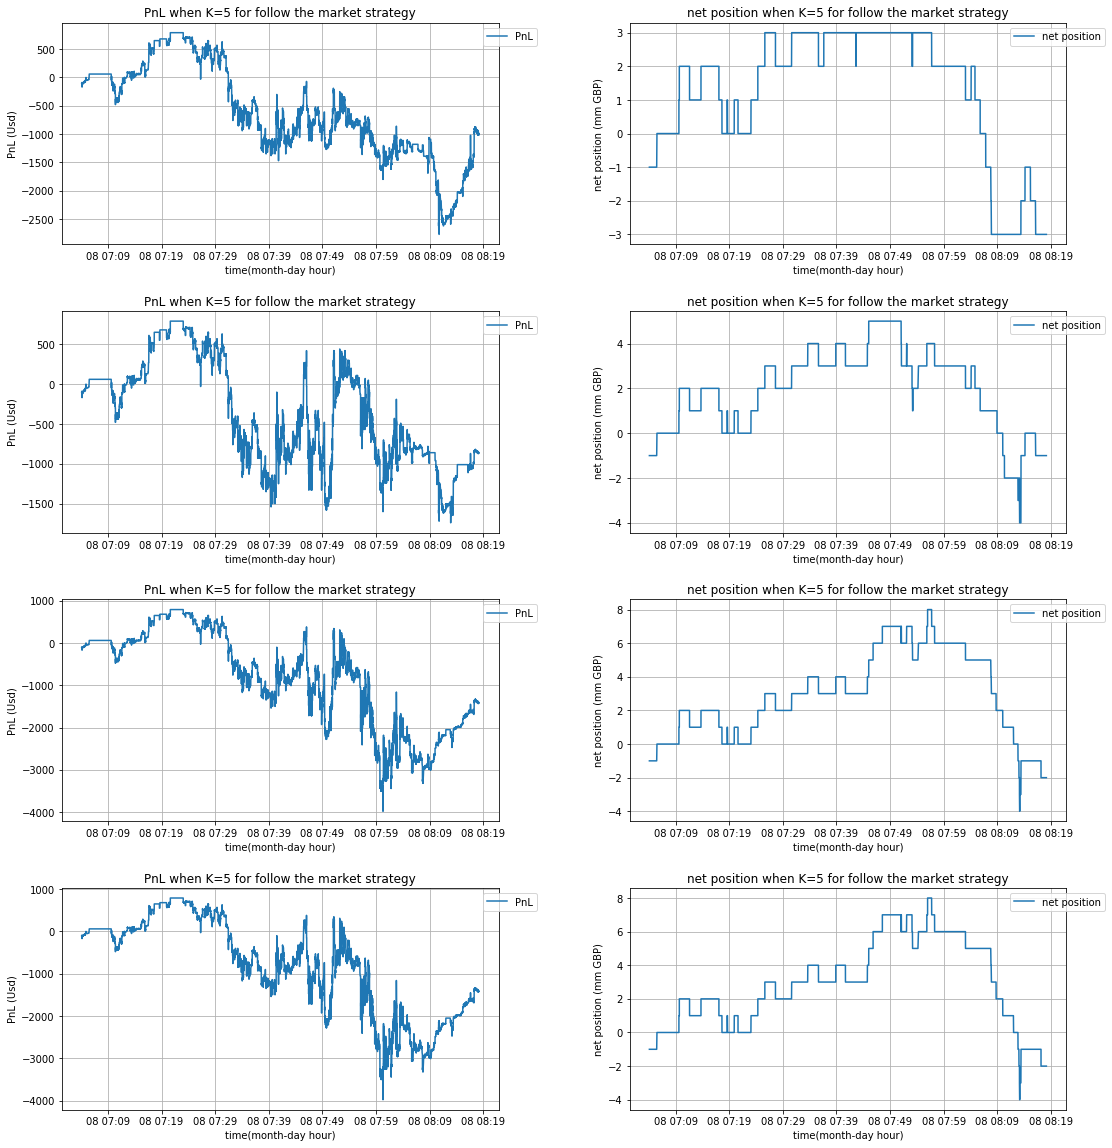

In [17]:
L =10000#no loss limit
k = 0.0001
X = 5
what_happen_list=[]
net_pos_list=[]
price_order_list=[]
following_market_order_1_res_2=plt.figure(figsize=(18,20))
for i,K in enumerate([3,5,8,10]): #X:MM reaction time — assume 5 msec — 
       #ie tie for MM to adjust its spread after a market event — new tick or new order whether filled or not 
    ba_MM.index = ba.index+datetime.timedelta(milliseconds=X)
    start_pos_M = find_pos(order_timestamp,ba)
    start_pos_MM = find_pos(order_timestamp,ba_MM)
   
    net_pos, PnL, cash_pos, what_happen, net_pos_order,my_index, price_order  = follow_market(ba,order_timestamp,start_pos_M,start_pos_MM,order,L,k,K)
    what_happen_list.append(what_happen)
    net_pos_list.append(net_pos_order)
    price_order_list.append(price_order)
    
    plt.subplot(4,2,2*(1+i)-1)
    plt.plot(ba.index[start_pos_M[0]:start_pos_M[-1]],np.array(PnL)*1000000)
    plt.legend(['PnL'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('PnL when K={} for follow the market strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('PnL (Usd)')
    
    
    
    plt.subplot(4,2,2*(i+1)) 
    plt.plot(ba.index[start_pos_M[0]:start_pos_M[-1]],net_pos)
    plt.legend(['net position'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('net position when K={} for follow the market strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('net position (mm GBP)')
    plt.subplots_adjust(wspace =0.3, hspace =0.3)
 

In [18]:
def print_X_counts(what_happen_list):
    what_happen_df = pd.DataFrame(np.array(what_happen_list).transpose())
    for i,X in enumerate([3,5,8,10]):

        pd.set_option('max_colwidth', 20)

     #   orders_res = pd.DataFrame({"Time":order["Time"],"Side":order["Side"],"what happened":what_happen_list[i],"net position":net_pos_list[i]})

        print('When X={}:'.format(X))
        #print(orders_res.head())
        print(what_happen_df[i].value_counts())

In [19]:
def print_K_counts(what_happen_list):
    what_happen_df = pd.DataFrame(np.array(what_happen_list).transpose())
    for i,K in enumerate([3,5,8,10]):

        pd.set_option('max_colwidth', 20)

     #   orders_res = pd.DataFrame({"Time":order["Time"],"Side":order["Side"],"what happened":what_happen_list[i],"net position":net_pos_list[i]})

        print('When K={}:'.format(K))
        #print(orders_res.head())
        print(what_happen_df[i].value_counts())

In [20]:
print_K_counts(what_happen_list)

When K=3:
max open position triggered    28
sell at M price and succeed    19
buy at M price and succeed     16
sell at M price but failed     14
buy at M price but failed      12
worse than market price         1
Name: 0, dtype: int64
When K=5:
sell at M price and succeed    25
buy at M price and succeed     24
sell at M price but failed     19
buy at M price but failed      18
max open position triggered     3
worse than market price         1
Name: 1, dtype: int64
When K=8:
sell at M price and succeed    26
buy at M price and succeed     24
buy at M price but failed      21
sell at M price but failed     18
worse than market price         1
Name: 2, dtype: int64
When K=10:
sell at M price and succeed    26
buy at M price and succeed     24
buy at M price but failed      21
sell at M price but failed     18
worse than market price         1
Name: 3, dtype: int64


In above figures and table, we can see that if there is no loss limit, we will not close our position and 'damage control' won't be triggered.

And because there is no net position limit and order set 1 just includes order from 2018-01-07 to 2018-01-08 , we will keep negative net position in the following days. 

What's more, we can see from above table that most orders are executed failed or market maker provides a worse price than market price.

### analysis for order set 2

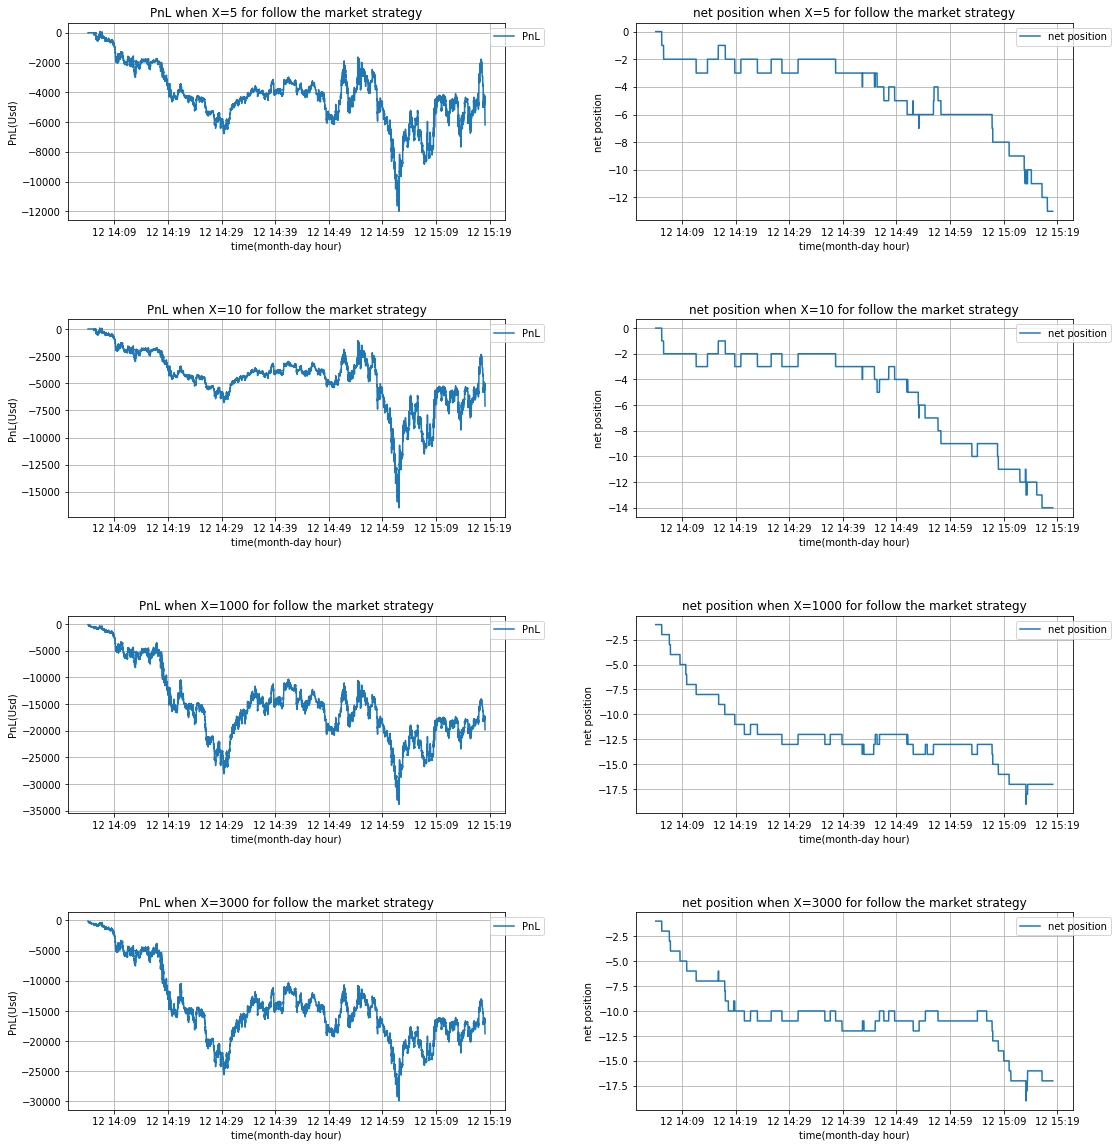

In [174]:
L =10000#no loss limit
k = 0.0001
K = 100#no net position limit
what_happen_list_2=[]
net_pos_list_2=[]
price_order_list_2=[]
following_market_order_2_X=plt.figure(figsize=(18,20))
for i,X in enumerate([5,10,1000,3000]): #X:MM reaction time — assume 5 msec — 
       #ie tie for MM to adjust its spread after a market event — new tick or new order whether filled or not 
    ba_MM.index = ba.index+datetime.timedelta(milliseconds=X)
    start_pos_M = find_pos(order_timestamp_2,ba)
    start_pos_MM_2 = find_pos(order_timestamp_2,ba_MM)
    
    net_pos, PnL, cash_pos, what_happen, net_pos_order,my_index, price_order  = follow_market(ba,order_timestamp_2,start_pos_M,start_pos_MM_2,order_2,L,k,K)
    what_happen_list_2.append(what_happen)
    net_pos_list_2.append(net_pos_order)
    price_order_list_2.append(price_order)
    
    plt.subplot(4,2,2*(1+i)-1)
    plt.plot(ba.index[start_pos_M[0]:(start_pos_M[-1])],np.array(PnL)*1000000)
    plt.legend(['PnL'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('PnL when X={} for follow the market strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('PnL(Usd)')
    
    
    
    plt.subplot(4,2,2*(i+1)) 
    plt.plot(ba.index[start_pos_M[0]:(start_pos_M[-1])],net_pos)
    plt.legend(['net position'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('net position when X={} for follow the market strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('net position')
    plt.subplots_adjust(wspace =0.3, hspace =0.5)



In [182]:
def print_X_counts(what_happen_list):
    what_happen_df = pd.DataFrame(np.array(what_happen_list).transpose())
    for i,X in enumerate([3,5,8,10]):

        pd.set_option('max_colwidth', 20)

     #   orders_res = pd.DataFrame({"Time":order["Time"],"Side":order["Side"],"what happened":what_happen_list[i],"net position":net_pos_list[i]})

        print('When X={}:'.format(X))
        #print(orders_res.head())
        print(what_happen_df[i].value_counts())

worse than market price        31
sell better than M price       26
buy better than M price         9
sell at M price but failed      9
buy at M price but failed       6
sell at M price and succeed     5
buy at M price and succeed      4
Name: what happened, dtype: int64


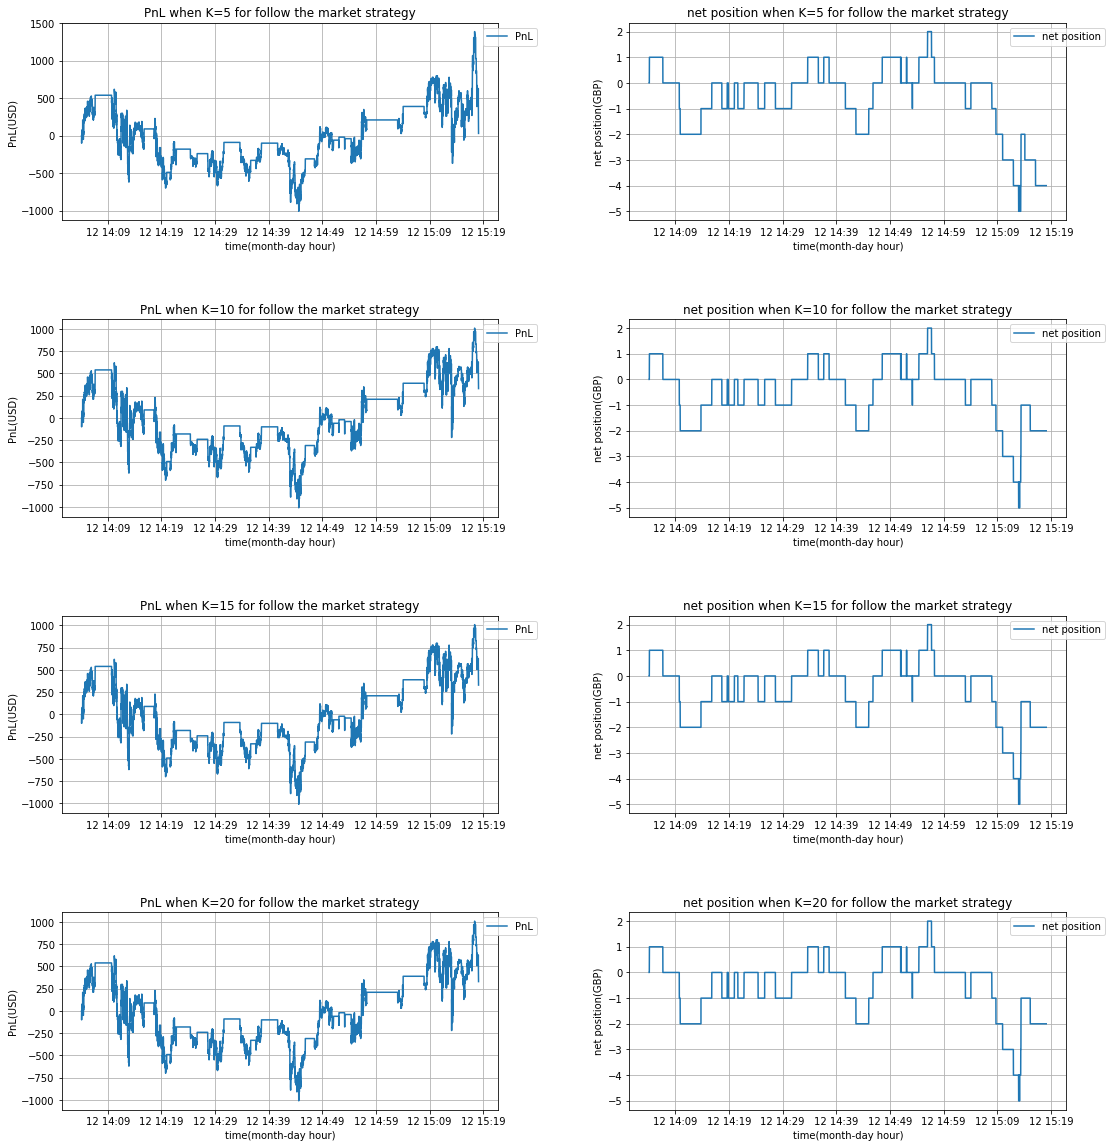

In [22]:
L =10000#no loss limit
k = 0.0001
X = 5#no net position limit
what_happen_list_2=[]
net_pos_list_2=[]
price_order_list_2=[]
following_market_order_2_K=plt.figure(figsize=(18,20))
for i,K in enumerate([5,10,15,20]): #X:MM reaction time — assume 5 msec — 
       #ie tie for MM to adjust its spread after a market event — new tick or new order whether filled or not 
    ba_MM.index = ba.index+datetime.timedelta(milliseconds=X)
    start_pos_M = find_pos(order_timestamp_2,ba)
    start_pos_MM_2 = find_pos(order_timestamp_2,ba_MM)
    
    net_pos, PnL, cash_pos, what_happen, net_pos_order,my_index, price_order  = follow_market(ba,order_timestamp_2,start_pos_M,start_pos_MM_2,order_2,L,k,K)
    what_happen_list_2.append(what_happen)
    net_pos_list_2.append(net_pos_order)
    price_order_list_2.append(price_order)
    
    plt.subplot(4,2,2*(1+i)-1)
    plt.plot(ba.index[start_pos_M[0]:(start_pos_M[-1])],np.array(PnL)*1000000)
    plt.legend(['PnL'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('PnL when K={} for follow the market strategy'.format(K))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('PnL(USD)')
    
    
    
    plt.subplot(4,2,2*(i+1)) 
    plt.plot(ba.index[start_pos_M[0]:(start_pos_M[-1])],net_pos)
    plt.legend(['net position'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('net position when K={} for follow the market strategy'.format(K))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('net position(GBP)')
    plt.subplots_adjust(wspace =0.3, hspace =0.5)



In [23]:
for i,X in enumerate([5,10,1000,3000]):
    
    pd.set_option('max_colwidth', 20)

    orders_res_2 = pd.DataFrame({"Time":order_2["Time"],"Side":order_2["Side"],"what happened":what_happen_list_2[i],"net position":net_pos_list_2[i]})
   
    print('When X={}:'.format(X))
    print(orders_res_2.head())
    print(orders_res_2['what happened'].value_counts())
    print()

When X=5:
                  Time Side        what happened  net position
0  1-12-2018 14:04:...    B  worse than marke...             0
1  1-12-2018 14:04:...    S  buy at M price a...             1
2  1-12-2018 14:05:...    B  sell at M price ...             1
3  1-12-2018 14:05:...    B  sell at M price ...             1
4  1-12-2018 14:06:...    B  sell at M price ...             0
sell at M price but failed     30
sell at M price and succeed    27
buy at M price and succeed     22
buy at M price but failed       7
worse than market price         2
buy better than M price         1
max open position triggered     1
Name: what happened, dtype: int64

When X=10:
                  Time Side        what happened  net position
0  1-12-2018 14:04:...    B  worse than marke...             0
1  1-12-2018 14:04:...    S  buy at M price a...             1
2  1-12-2018 14:05:...    B  sell at M price ...             1
3  1-12-2018 14:05:...    B  sell at M price ...             1
4  1-12-2018 

In the above table and figures, it's clear that if we simply quote price following market price and don't set limit net position and max loss, we loss lots of buy orders.

We can see from net position figure that we will be in a negative position after some time.
Bbecause order times are in 2018-01-12, with time increasing, market price increases and we will loss more. Which is shown in PnL figure.

To sum up, in market following strategy, without net position limit and max loss limit, we will lose lots of orders and when there is a market price trend we will lose a lot.

# MM strategy

In MM strategy, MM is allowed to tighten, skew or widen its price offering at any point of time but not before reaction time after a new market event — X.

We set two half boundary to skew price to get more orders and avoid touch the boundary K. to be continued...

In [110]:
ba_MM.head()

,Bid,Ask
DateTime,,
2018-01-07 22:02:06.832,1.35560,1.35616
2018-01-07 22:02:06.845,1.35560,1.35617
2018-01-07 22:02:06.851,1.35554,1.35617
2018-01-07 22:02:06.859,1.35554,1.35618
2018-01-07 22:02:07.114,1.35554,1.35619


In [24]:
ba_MM_array=np.array(ba_MM)

In [93]:
def MM_strategy(ba,order_timestamp,start_pos_M,order,L,k,K,skew_price,X):   
    #L: max PnL loss,k: price markup to settle with other market makers,K: open position limit
    net_pos_temp = 0 #if positive means we have GBP(Base currency), if negative means we have short position in GBP.
    curr_order = 0#ith order
    net_pos = [] 
    PnL = [] # if we settled our pos immedeately
    my_index = []
    
    cash_pos = []
    cash_pos_temp = 0 # in USD,how much we have in cash or how much we owe
    what_happen=[]
    net_pos_order = []
    price_order=[]
    extra_order =[]
    
    random.seed(a = 30)
    ba_MM = ba.copy()
    ba_MM.index = ba_MM.index+datetime.timedelta(milliseconds=X)
    start_pos_MM = find_pos(order_timestamp,ba_MM)
    ba_MM_array=np.array(ba_MM)
    last_order_time = order_timestamp-datetime.timedelta(milliseconds=X+1)
    m =2
    
    
    for i in np.arange(start_pos_MM[0],start_pos_MM[-1]+1):
        if (net_pos_temp<= (-m)):
            ba_MM_array[i][0]=ba_MM_array[i][0]+skew_price
            

        if(net_pos_temp>= (m) ):

            ba_MM_array[i][1]= ba_MM_array[i][1]- skew_price
            
        if (i == start_pos_MM[curr_order] and order["Side"][curr_order]=="B" and net_pos_temp<=-K):
            what_happen.append("max open position triggered")
            price_order.append("-")
            net_pos_order.append(net_pos_temp)
            curr_order+=1
            if(curr_order == len(order_timestamp)):break
        if (i == start_pos_MM[curr_order] and order["Side"][curr_order]=="B" and net_pos_temp>-K):
            M  = ba["Ask"][start_pos_M[curr_order]]
            MM = ba_MM_array[i][1]#ask
            if( MM == M ):
                if (random.random()>0.5):
                    what_happen.append("sell at M price and succeed")
                    price_order.append(MM)
                    last_order_time = order_timestamp[curr_order]
                    net_pos_temp -=1 # buy gbp from me, my net_pos will decrease by 1
                    cash_pos_temp += MM #buy gbp from me，you need to pay me in USD at MM price
                    net_pos_order.append(net_pos_temp)
                else:
                    what_happen.append("sell at M price but failed")
                    price_order.append("-")
                    net_pos_order.append(net_pos_temp)
                
            if(MM<M):
                what_happen.append("sell better than M price")
                last_order_time = order_timestamp[curr_order]
                price_order.append(MM)
                net_pos_temp -=1
                cash_pos_temp += MM
                if (random.random()>0.75):
                    net_pos_temp -=1
                    cash_pos_temp += MM
                    extra_order.append((order_timestamp[curr_order]+datetime.timedelta(milliseconds=5),"B","Extra order",net_pos_temp,MM))#Y =5
                    
                
                net_pos_order.append(net_pos_temp)
            if(MM>M):
                what_happen.append("worse than market price")
                price_order.append("-")
                net_pos_order.append(net_pos_temp)
            curr_order+=1
            if(curr_order == len(order_timestamp)):break
                
                
        if (i == start_pos_MM[curr_order] and order["Side"][curr_order]=="S"and net_pos_temp>=K):
            what_happen.append("max open position triggered")    
            price_order.append("-")
            net_pos_order.append(net_pos_temp)
            curr_order+=1
            if(curr_order == len(order_timestamp)):break
        if (i == start_pos_MM[curr_order] and order["Side"][curr_order]=="S"and net_pos_temp<K):
            M  = ba["Bid"][start_pos_M[curr_order]]
            MM = ba_MM_array[i][0]#bid
            if( MM == M ):
                if (random.random()>0.5):
                    what_happen.append("buy at M price and succeed")
                    price_order.append(MM)
                    net_pos_temp +=1 # buy 1mm gbp from me, my net_pos will decrease by 1
                    cash_pos_temp -=  MM #buy 1mm gbp from me，you need to pay me in USD at MM price   
                    net_pos_order.append(net_pos_temp)
                    last_order_time = order_timestamp[curr_order]
                else:
                    what_happen.append("buy at M price but failed")
                    price_order.append("-")
                    net_pos_order.append(net_pos_temp)
            if(MM>M):
                what_happen.append("buy better than M price")
                last_order_time = order_timestamp[curr_order]
                price_order.append(MM)
                net_pos_temp +=1
                cash_pos_temp -= MM
                if (random.random()>0.75):
                    net_pos_temp +=1
                    cash_pos_temp -= MM
                    extra_order.append((order_timestamp[curr_order]+datetime.timedelta(milliseconds=5),"S","Extra order",net_pos_temp,MM))#Y =5
                net_pos_order.append(net_pos_temp)
            if(MM<M):
                what_happen.append("worse than market price")
                price_order.append("-")
                net_pos_order.append(net_pos_temp)
                
            curr_order+=1
            if(curr_order == len(order_timestamp)):break
            
            
        if (net_pos_temp>0): #we have gbp and need to sell to the market to clear our position
            PnL.append(cash_pos_temp+(net_pos_temp*(ba["Bid"][i]-k)))
        if(net_pos_temp < 0):PnL.append(cash_pos_temp +(net_pos_temp*(ba["Ask"][i]+k)))
        if(net_pos_temp == 0):PnL.append(cash_pos_temp)
        
        if (PnL[-1]<-L):
            print("damage control")
            break
            print(ba.index[i])
            
        cash_pos.append(cash_pos_temp)
        net_pos.append(net_pos_temp)
        my_index.append(ba.index[start_pos_MM[curr_order-1]])
        
        while(start_pos_MM[curr_order-1]==start_pos_MM[curr_order]):#multiple order in one tick
            if  (net_pos_temp<= (m)) :
                ba_MM_array[i][0]=ba_MM_array[i][0]+skew_price
                last_order_time = order_timestamp[curr_order]
            if(net_pos_temp>=(m)) :
                ba_MM_array[i][1]=ba_MM_array[i][1]-skew_price
                last_order_time = order_timestamp[curr_order]
            if (i == start_pos_MM[curr_order] and order["Side"][curr_order]=="B" and net_pos_temp<=-K):
                what_happen.append("max open position triggered")
                price_order.append("-")
                net_pos_order.append(net_pos_temp)
                curr_order+=1
                if(curr_order == len(order_timestamp)):break
            if (i == start_pos_MM[curr_order] and order["Side"][curr_order]=="B" and net_pos_temp>-K):
                M  = ba["Ask"][start_pos_M[curr_order]]
                MM = ba_MM_array[i][1]#ask
                if( MM == M ):
                    if (random.random()>0.5):
                        what_happen.append("sell at M price and succeed")
                        price_order.append(MM)
                        last_order_time = order_timestamp[curr_order]
                        net_pos_temp -=1 # buy gbp from me, my net_pos will decrease by 1
                        cash_pos_temp += MM #buy gbp from me，you need to pay me in USD at MM price
                        net_pos_order.append(net_pos_temp)
                    else:
                        what_happen.append("sell at M price but failed")
                        price_order.append("-")
                        net_pos_order.append(net_pos_temp)

                if(MM<M):
                    what_happen.append("sell better than M price")
                    last_order_time = order_timestamp[curr_order]
                    price_order.append(MM)
                    net_pos_temp -=1
                    cash_pos_temp += MM
                    if (random.random()>0.75):
                        net_pos_temp -=1
                        cash_pos_temp += MM
                        extra_order.append((order_timestamp[curr_order]+datetime.timedelta(milliseconds=5),"B","Extra order",net_pos_temp,MM))#Y =5
                    net_pos_order.append(net_pos_temp)
                if(MM>M):
                    what_happen.append("worse than market price")
                    price_order.append("-")
                    net_pos_order.append(net_pos_temp)
                curr_order+=1
                if(curr_order == len(order_timestamp)):break


            if (i == start_pos_MM[curr_order] and order["Side"][curr_order]=="S"and net_pos_temp>=K):
                what_happen.append("max open position triggered")  
                price_order.append("-")
                net_pos_order.append(net_pos_temp)
                curr_order+=1
                if(curr_order == len(order_timestamp)):break
            if (i == start_pos_MM[curr_order] and order["Side"][curr_order]=="S"and net_pos_temp<K):
                M  = ba["Bid"][start_pos_M[curr_order]]
                MM = ba_MM_array[i][0]#bid
                if( MM == M ):
                    if (random.random()>0.5):
                        what_happen.append("buy at M price and succeed")
                        price_order.append(MM)
                        net_pos_temp +=1 # buy 1mm gbp from me, my net_pos will decrease by 1
                        cash_pos_temp -=  MM #buy 1mm gbp from me，you need to pay me in USD at MM price   
                        net_pos_order.append(net_pos_temp)
                        last_order_time = order_timestamp[curr_order]
                    else:
                        what_happen.append("buy at M price but failed")
                        price_order.append("-")
                        net_pos_order.append(net_pos_temp)
                if(MM>M):
                    what_happen.append("buy better than M price")
                    price_order.append(MM)
                    last_order_time = order_timestamp[curr_order]
                    net_pos_temp +=1
                    cash_pos_temp -= MM
                    if (random.random()>0.75):
                        net_pos_temp +=1
                        cash_pos_temp -= MM
                        extra_order.append((order_timestamp[curr_order]+datetime.timedelta(milliseconds=5),"S","Extra order",net_pos_temp,MM))#Y =5
                    
                    net_pos_order.append(net_pos_temp)
                if(MM<M):
                    what_happen.append("worse than market price")
                    price_order.append("-")
                    net_pos_order.append(net_pos_temp)
                curr_order+=1
                if(curr_order == len(order_timestamp)):break


            if (net_pos_temp>0): #we have gbp and need to sell to the market to clear our position
                PnL[-1]=(cash_pos_temp+(net_pos_temp*(ba["Bid"][i]-k)))
            if(net_pos_temp < 0):PnL[-1]=(cash_pos_temp +(net_pos_temp*(ba["Ask"][i]+k)))
            if(net_pos_temp == 0):PnL[-1]=(cash_pos_temp)

            if (PnL[-1]<-L):
                print("damage control")
                break
                print(ba.index[i])

            cash_pos.append(cash_pos_temp)
            net_pos[-1]=(net_pos_temp)
            my_index.append(order_timestamp[curr_order-1])


            
        
    return [net_pos,PnL,cash_pos,what_happen,net_pos_order,my_index,ba_MM_array,price_order,extra_order] 
                       
                       
        
            
        
                
        

###### Analysis for order set 1

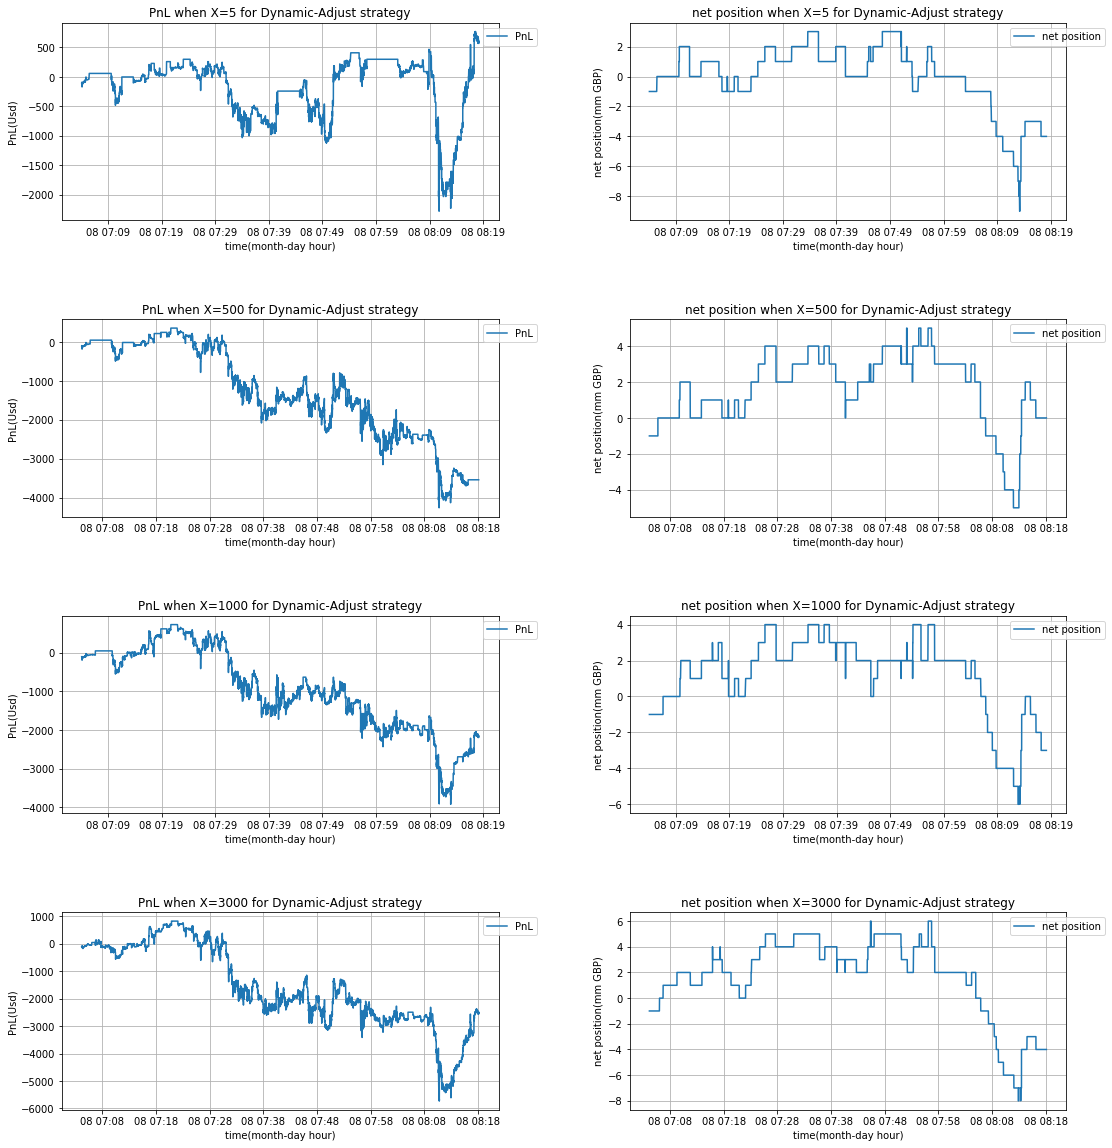

In [94]:
L =10000
k = 0.0001
K = 10#no net position limit
skew_price=0.00001
X =5

what_happen_list_MM=[]
net_pos_list_MM=[]
price_order_list_MM=[]
DA_strategy_figure_order_1_X=plt.figure(figsize=(18,20))
for i,X in enumerate([5,500,1000,3000]):
    
    

    ba_MM.index = ba.index+datetime.timedelta(milliseconds=X)
    start_pos_M = find_pos(order_timestamp,ba)
    
    net_pos, PnL, cash_pos, what_happen, net_pos_order,my_index,ba_MM_array,price_order,extra_order  = MM_strategy(ba,order_timestamp,start_pos_M,order,L,k,K,skew_price,X)
    what_happen_list_MM.append(what_happen)
    net_pos_list_MM.append(net_pos_order)
    price_order_list_MM.append(price_order)
    
    plt.subplot(4,2,2*(1+i)-1)
    plt.plot(ba.index[start_pos_M[0]:start_pos_M[0]+len(PnL)],np.array(PnL)*1000000)
    plt.legend(['PnL'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('PnL when X={} for Dynamic-Adjust strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('PnL(Usd)')
    
    
    
    plt.subplot(4,2,2*(i+1)) 
    plt.plot(ba.index[start_pos_M[0]:start_pos_M[0]+len(PnL)],net_pos)
    plt.legend(['net position'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('net position when X={} for Dynamic-Adjust strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('net position(mm GBP)')
    plt.subplots_adjust(wspace =0.3, hspace =0.5)



**For skew prices**

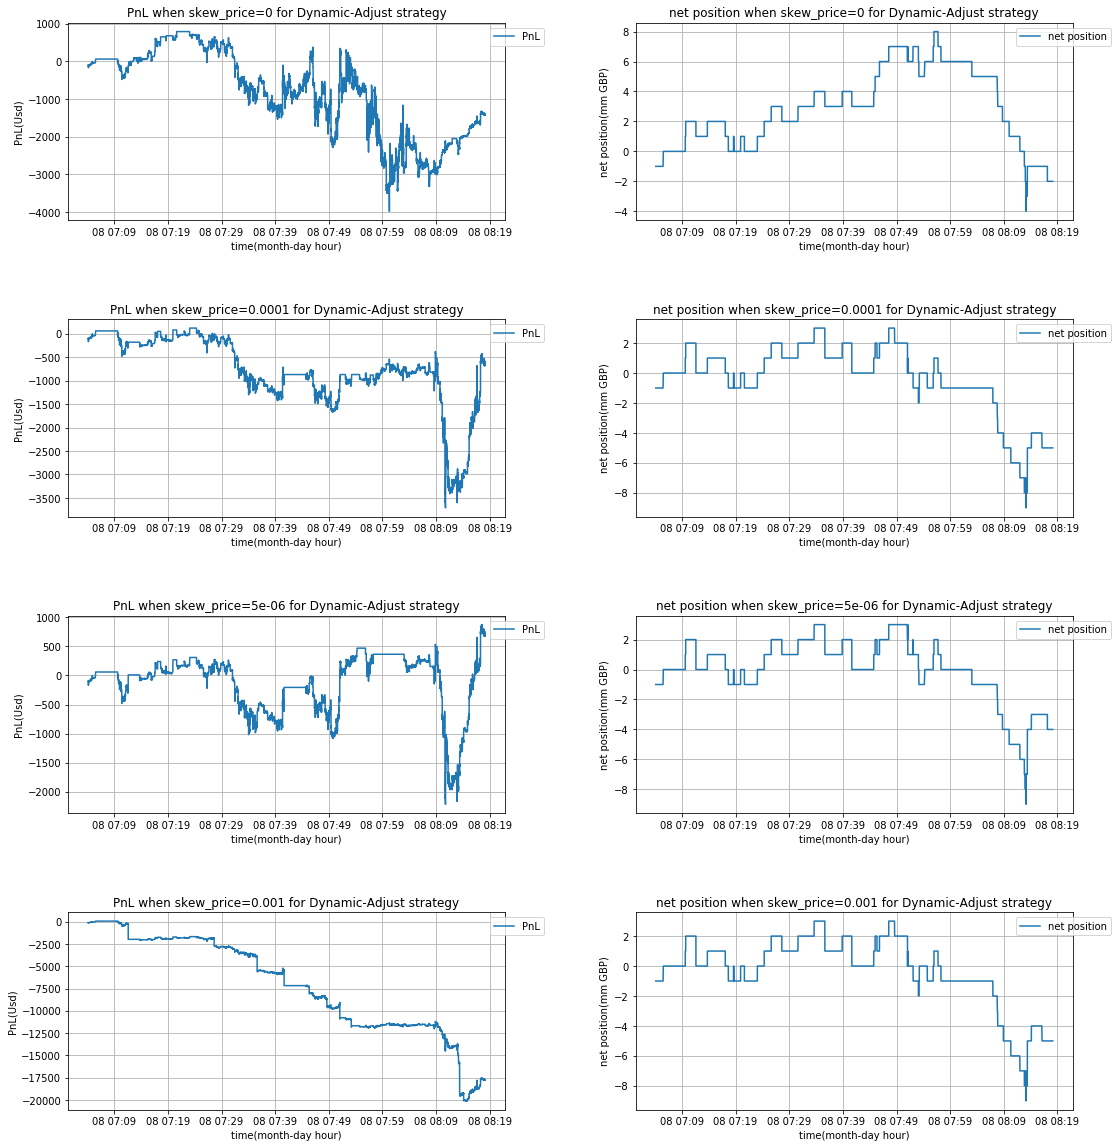

In [131]:
L =10000
k = 0.0001
X = 5
K = 10


what_happen_list_MM=[]
net_pos_list_MM=[]
price_order_list_MM=[]
DA_strategy_figure_order_1_skew_price=plt.figure(figsize=(18,20))
for i,skew_price in enumerate([0,0.0001,0.000005,0.001]):
    
    

    ba_MM.index = ba.index+datetime.timedelta(milliseconds=X)
    start_pos_M = find_pos(order_timestamp,ba)
    
    net_pos, PnL, cash_pos, what_happen, net_pos_order,my_index,ba_MM_array,price_order,extra_order  = MM_strategy(ba,order_timestamp,start_pos_M,order,L,k,K,skew_price,X)
    what_happen_list_MM.append(what_happen)
    net_pos_list_MM.append(net_pos_order)
    price_order_list_MM.append(price_order)
    
    plt.subplot(4,2,2*(1+i)-1)
    plt.plot(ba.index[start_pos_M[0]:(start_pos_M[-1])],np.array(PnL)*1000000)
    plt.legend(['PnL'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('PnL when skew_price={} for Dynamic-Adjust strategy'.format(skew_price))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('PnL(Usd)')
    
    
    
    plt.subplot(4,2,2*(i+1)) 
    plt.plot(ba.index[start_pos_M[0]:(start_pos_M[-1])],net_pos)
    plt.legend(['net position'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('net position when skew_price={} for Dynamic-Adjust strategy'.format(skew_price))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('net position(mm GBP)')
    plt.subplots_adjust(wspace =0.3, hspace =0.5)



In [137]:
what_happen[50:90]

['buy at M price but failed',
 'sell at M price and succeed',
 'sell at M price and succeed',
 'sell at M price but failed',
 'buy better than M price',
 'buy at M price and succeed',
 'buy at M price but failed',
 'buy at M price but failed',
 'sell at M price and succeed',
 'buy at M price and succeed',
 'buy at M price and succeed',
 'sell at M price and succeed',
 'sell at M price and succeed',
 'sell at M price but failed',
 'buy at M price but failed',
 'sell at M price but failed',
 'sell at M price but failed',
 'sell at M price but failed',
 'sell at M price and succeed',
 'sell at M price and succeed',
 'sell at M price and succeed',
 'sell at M price but failed',
 'sell at M price and succeed',
 'sell at M price but failed',
 'sell at M price and succeed',
 'sell at M price and succeed',
 'sell at M price and succeed',
 'sell at M price but failed',
 'buy better than M price',
 'sell at M price and succeed',
 'sell at M price and succeed',
 'buy better than M price',
 'buy b

In [104]:
ba[["Bid","Ask"]][start_pos_M]

KeyError: '[48362 48363 48493 48507 48600 48686 49126 49219 49232 49259 49634 49987\n 50144 50145 50346 50348 50423 50540 50542 50608 50735 50846 50938 50953\n 51124 51331 51746 52511 53168 53600 53768 53940 54147 54149 54724 54725\n 55398 55405 55453 55894 55946 55968 55988 56058 56252 56499 56688 57390\n 57401 57412 57653 57658 57891 57912 57915 57923 58084 58098 58132 58237\n 58240 58511 58724 60843 61212 61330 61489 61620 61638 61705 61707 61802\n 61858 62078 62141 62568 62659 62697 62714 62721 62722 62727 62745 62747\n 62747 62886 62995 63312 63602 63768] not in index'

In [ ]:
for i,K in enumerate([5,10,1000,3000]):
    
    pd.set_option('max_colwidth', 20)

    MMorders_res = pd.DataFrame({"Time":order["Time"],"Side":order["Side"],"what happened":what_happen_list_MM[i],"net position":net_pos_list_MM[i]})
   
    print('When K={}:'.format(K))
    print(MMorders_res.head())
    print(MMorders_res['what happened'].value_counts())
    print()

###### Analysis for order set 2

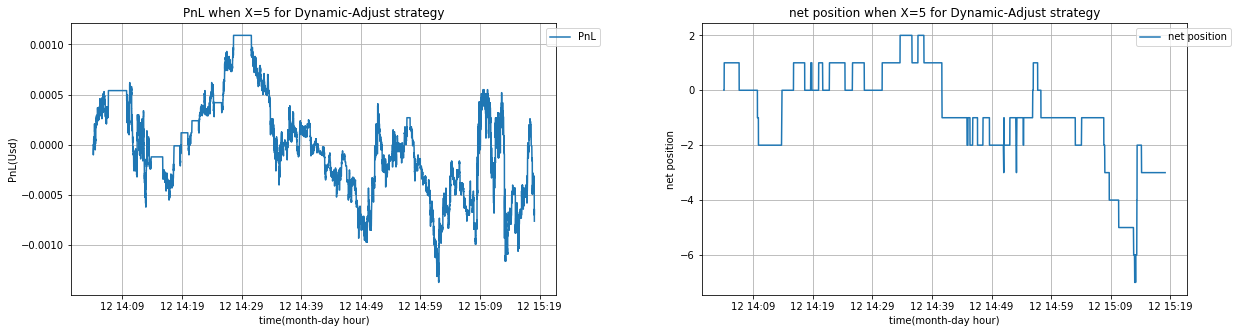

In [155]:
L =10000
k = 0.0001
K = 10#no net position limit
skew_price=0.0001

what_happen_list_MM2=[]
net_pos_list_MM2=[]
price_order_list_MM2=[]
DA_strategy_figure_order_2=plt.figure(figsize=(20,5))
for i,X in enumerate([5]):
    
    ba_MM.index = ba.index+datetime.timedelta(milliseconds=X)
    start_pos_M = find_pos(order_timestamp_2,ba)
    
    net_pos, PnL, cash_pos, what_happen, net_pos_order,my_index,ba_MM_array,price_order,extra_order  = MM_strategy(ba,order_timestamp_2,start_pos_M,order_2,L,k,K,skew_price,X)
    what_happen_list_MM2.append(what_happen)
    net_pos_list_MM2.append(net_pos_order)
    price_order_list_MM2.append(price_order)
    
    plt.subplot(1,2,2*(1+i)-1)
    plt.plot(ba.index[start_pos_M[0]:start_pos_M[0]+len(PnL)],PnL)
    plt.legend(['PnL'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('PnL when X={} for Dynamic-Adjust strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('PnL(Usd)')
    
    
    
    plt.subplot(1,2,2*(i+1)) 
    plt.plot(ba.index[start_pos_M[0]:start_pos_M[0]+len(PnL)],net_pos)
    plt.legend(['net position'],bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.title('net position when X={} for Dynamic-Adjust strategy'.format(X))
    plt.xlabel('time(month-day hour)')
    plt.ylabel('net position')
    plt.subplots_adjust(wspace =0.3, hspace =0.5)



In [ ]:
for i,X in enumerate([5,10,1000,3000]):
    
    pd.set_option('max_colwidth', 20)

    MMorders_res_2 = pd.DataFrame({"Time":order_2["Time"],"Side":order_2["Side"],"what happened":what_happen_list_MM2[i],"net position":net_pos_list_MM2[i]})
   
    print('When X={}:'.format(X))
    print(MMorders_res_2.head())
    print(MMorders_res_2['what happened'].value_counts())
    print()

In [154]:
i=0
MMorders_res_2 = pd.DataFrame({"Time":order_2["Time"],"Side":order_2["Side"],"what happened":what_happen_list_MM2[i],"net position":net_pos_list_MM2[i]})
MMorders_res_2['what happened'].value_counts()

sell at M price and succeed    31
sell at M price but failed     25
buy better than M price        16
buy at M price and succeed     10
buy at M price but failed       4
sell better than M price        2
worse than market price         2
Name: what happened, dtype: int64

In [ ]:
plt.figure()
a = 10
b = 100
plt.plot(ba_MM_array[a:b])
plt.plot(np.array(ba["Bid"][a:b]))
plt.plot(np.array(ba["Ask"][a:b]))
plt.legend(['MM_Bid','MM_Ask','M_Bid','M_Ask'],bbox_to_anchor=(1.1,1))
plt.grid()
plt.title('MM quotation and Market quotation')
plt.xlabel('Order')
plt.ylabel('Price')
_ = plt.show()

In [ ]:
ba_MM_update=pd.DataFrame(ba_MM_array)
ba_MM_update.columns=['MM_Bid','MM_Ask']

In [79]:
extra_order

[(Timestamp('2018-01-08 07:11:38.829005'), 'B', 'Extra order', 0, 1.35425),
 (Timestamp('2018-01-08 07:35:38.793005'), 'B', 'Extra order', 1, 1.35426),
 (Timestamp('2018-01-08 07:40:39.798005'), 'B', 'Extra order', 0, 1.35433),
 (Timestamp('2018-01-08 07:51:02.599005'), 'B', 'Extra order', 0, 1.35447)]

In [78]:
orders_res = pd.DataFrame({"Time":order["Time"],"Side":order["Side"],
                           "what_happen":what_happen,"net_position":net_pos_order,"price":price_order})
orders_res[30:60]

,Time,Side,what_happen,net_position,price
30,1-8-2018 7:36:38...,S,buy at M price b...,1,-
31,1-8-2018 7:37:38...,B,sell at M price ...,1,-
32,1-8-2018 7:38:50...,B,sell at M price ...,1,-
33,1-8-2018 7:38:52...,S,buy at M price a...,2,1.35421
34,1-8-2018 7:40:39...,B,sell better than...,0,1.35433
35,1-8-2018 7:40:40...,S,buy at M price b...,0,-
36,1-8-2018 7:42:38...,B,sell at M price ...,0,-
37,1-8-2018 7:42:39...,S,buy at M price b...,0,-
38,1-8-2018 7:42:55...,S,buy at M price b...,0,-
39,1-8-2018 7:44:44...,S,buy at M price a...,1,1.35431


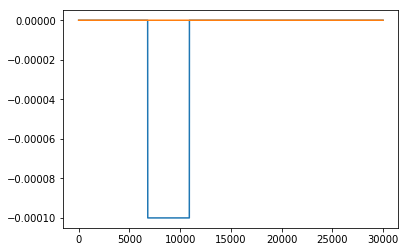

In [120]:
plt.plot((np.array(ba_MM)-ba_MM_array)[1405151:1435151])